# Unsupervised Learning: Trade&Ahead



### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

from sklearn.decomposition import PCA

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA # Principal Component Analysis

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 #loading the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stock_data.csv')

In [ ]:
data.shape

(340, 15)

In [ ]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

## Data Overview

- Observations
- Sanity checks


In [ ]:
# let's look at the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [ ]:
df.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0                  6.681299e+08    3.718174  -8.784219  
1                  1.633016e+09   18.806350  -8.750068  
2                  1.504422e+09   15.275510  -0.394171  
3                  4.996437e+08   74.555557   4.199651  
4                  2.247994e+09  178.451613   1.059810

In [ ]:
df.describe()

Current Price  Price Change  Volatility         ROE  Cash Ratio  \
count     340.000000    340.000000  340.000000  340.000000  340.000000   
mean       80.862345      4.078194    1.525976   39.597059   70.023529   
std        98.055086     12.006338    0.591798   96.547538   90.421331   
min         4.500000    -47.129693    0.733163    1.000000    0.000000   
25%        38.555000     -0.939484    1.134878    9.750000   18.000000   
50%        59.705000      4.819505    1.385593   15.000000   47.000000   
75%        92.880001     10.695493    1.695549   27.000000   99.000000   
max      1274.949951     55.051683    4.580042  917.000000  958.000000   

       Net Cash Flow    Net Income  Earnings Per Share  \
count   3.400000e+02  3.400000e+02          340.000000   
mean    5.553762e+07  1.494385e+09            2.776662   
std     1.946365e+09  3.940150e+09            6.587779   
min    -1.120800e+10 -2.352800e+10          -61.200000   
25%    -1.939065e+08  3.523012e+08            1.557500   
50%     2.098000e+06  7.073360e+08            2.895000   
75%     1.698108e+08  1.899000e+09            4.620000   
max     2.076400e+10  2.444200e+10           50.090000   

       Estimated Shares Outstanding   P/E Ratio   P/B Ratio  
count                  3.400000e+02  340.000000  340.000000  
mean                   5.770283e+08   32.612563   -1.718249  
std                    8.458496e+08   44.348731   13.966912  
min                    2.767216e+07    2.935451  -76.119077  
25%                    1.588482e+08   15.044653   -4.352056  
50%                    3.096751e+08   20.819876   -1.067170  
75%                    5.731175e+08   31.764755    3.917066  
max                    6.159292e+09  528.039074  129.064585

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

No dumplicates or missing values exist within the dataset.

In [ ]:
df.nunique()

Ticker Symbol                   340
Security                        340
GICS Sector                      11
GICS Sub Industry               104
Current Price                   336
Price Change                    340
Volatility                      340
ROE                              82
Cash Ratio                      124
Net Cash Flow                   332
Net Income                      335
Earnings Per Share              268
Estimated Shares Outstanding    323
P/E Ratio                       295
P/B Ratio                       299
dtype: int64

In [ ]:
#value counts for GCIS and GCIS sub industry
# Function to display value counts and percentages for each categorical column
def display_value_counts(df, column_names):
    for column_name in column_names:
        value_counts = df[column_name].value_counts()
        unique_categories = value_counts.size
        total_count = len(df[column_name])

        value_counts_df = value_counts.reset_index()
        value_counts_df.columns = [column_name, 'Count']
        value_counts_df['Percentage'] = (value_counts_df['Count'] / total_count * 100).round(2)

        print(f"\n{column_name} - Total categories: {unique_categories}")
        print(f"Total observations: {total_count}")
        print(f"\n{column_name} counts and percentages:")
        print(value_counts_df.to_string(index=False))

# Specify the column names for which you want to display the summary
categorical_columns = ['GICS Sector', 'GICS Sub Industry']

# Display value counts for the specified columns
display_value_counts(df, categorical_columns)



GICS Sector - Total categories: 11
Total observations: 340

GICS Sector counts and percentages:
                GICS Sector  Count  Percentage
                Industrials     53       15.59
                 Financials     49       14.41
                Health Care     40       11.76
     Consumer Discretionary     40       11.76
     Information Technology     33        9.71
                     Energy     30        8.82
                Real Estate     27        7.94
                  Utilities     24        7.06
                  Materials     20        5.88
           Consumer Staples     19        5.59
Telecommunications Services      5        1.47

GICS Sub Industry - Total categories: 104
Total observations: 340

GICS Sub Industry counts and percentages:
                              GICS Sub Industry  Count  Percentage
             Oil & Gas Exploration & Production     16        4.71
                                          REITs     14        4.12
                       Indus

The GCIS Sectors that were the most prevalent in the dataset include Industrial with 53 counts, contributing t 15.59% of the data and Financials accounting to 49 counts with 14.41% of the data. The two least prevalent sectors are Counter Staples at 5.59% with 19 counts and Telecommunication Services at 1.47% and 5 counts.

When it comes to GICS sub industries, the top most frequent industries in the data set are Oil and Gas Exploration and Products with a count of 16, and  REITs and Industrial Conglomerates each with a count of 14.


In [ ]:
df.drop("Ticker Symbol", axis=1, inplace=True)

In [ ]:
df.drop("Security", axis=1, inplace=True)

We drop "Security" and "Ticker Symbol" as they are identifiers and are all unique entries.


In [ ]:
df.head()

GICS Sector      GICS Sub Industry  Current Price  Price Change  \
0             Industrials               Airlines      42.349998      9.999995   
1             Health Care        Pharmaceuticals      59.240002      8.339433   
2             Health Care  Health Care Equipment      44.910000     11.301121   
3  Information Technology   Application Software      93.940002     13.977195   
4  Information Technology         Semiconductors      55.320000     -1.827858   

   Volatility  ROE  Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0    1.687151  135          51     -604000000  7610000000               11.39   
1    2.197887  130          77       51000000  5144000000                3.15   
2    1.273646   21          67      938000000  4423000000                2.94   
3    1.357679    9         180     -240840000   629551000                1.26   
4    1.701169   14         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0                  6.681299e+08    3.718174  -8.784219  
1                  1.633016e+09   18.806350  -8.750068  
2                  1.504422e+09   15.275510  -0.394171  
3                  4.996437e+08   74.555557   4.199651  
4                  2.247994e+09  178.451613   1.059810

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?


**Additional Findings**
Stock price is skewed to the right, having a few high priced stock prices that perform as outliers in the dataset.


In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

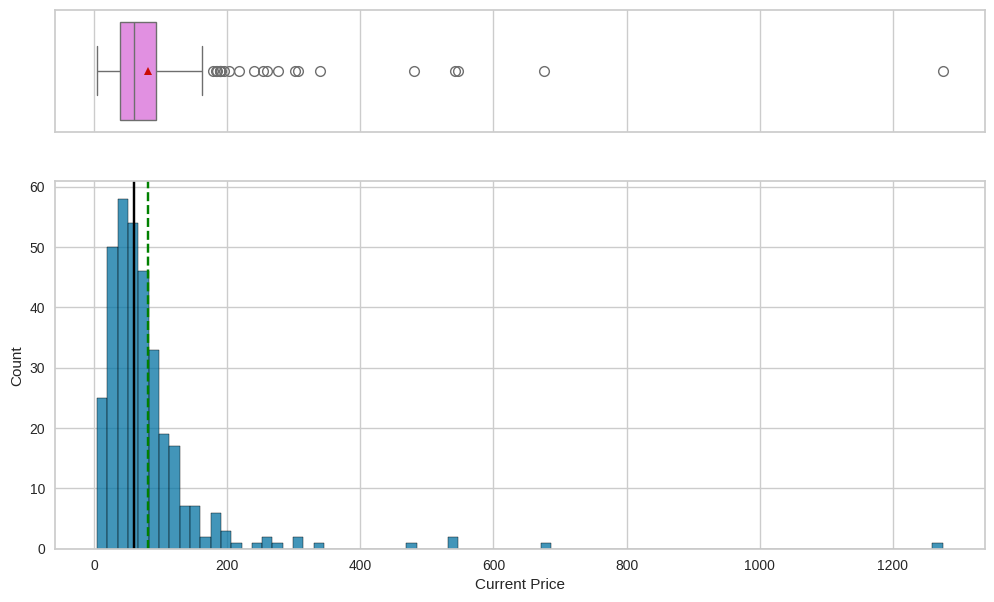

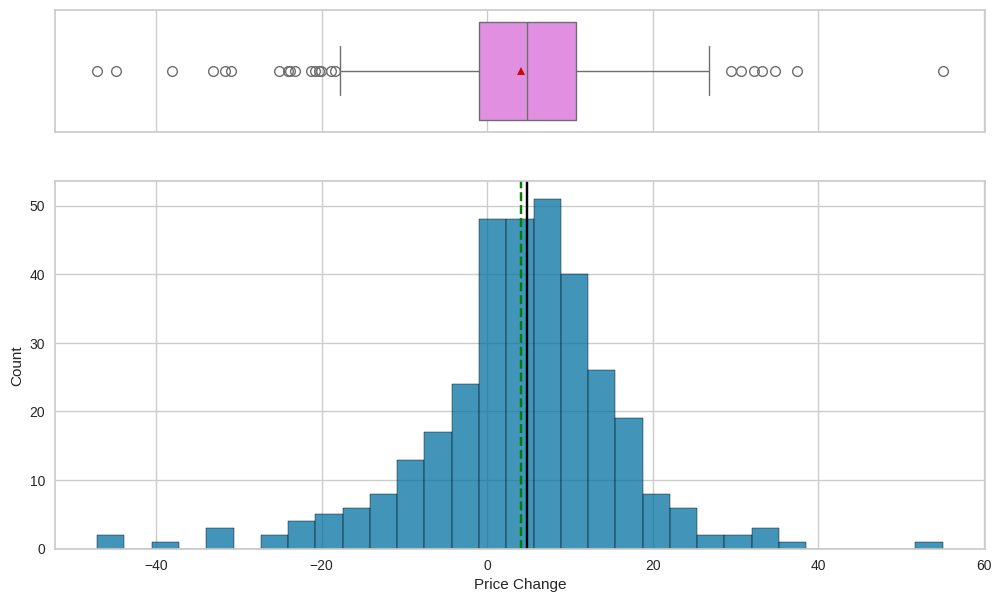

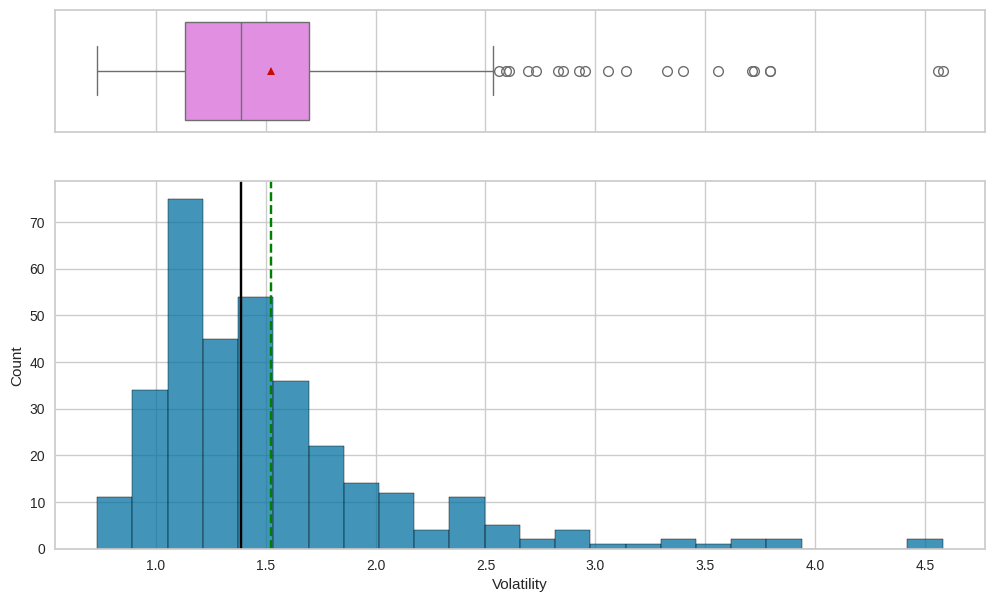

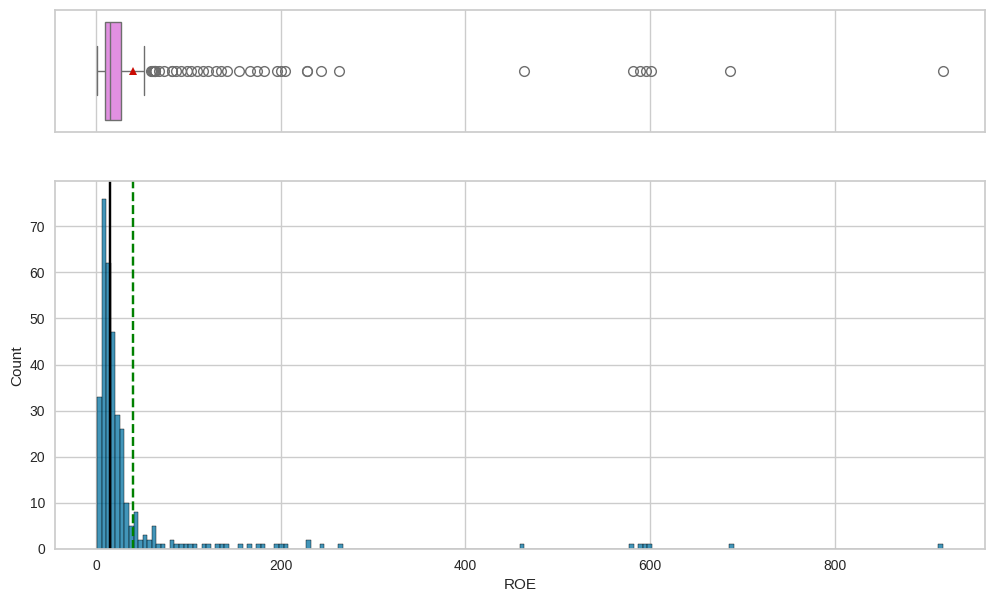

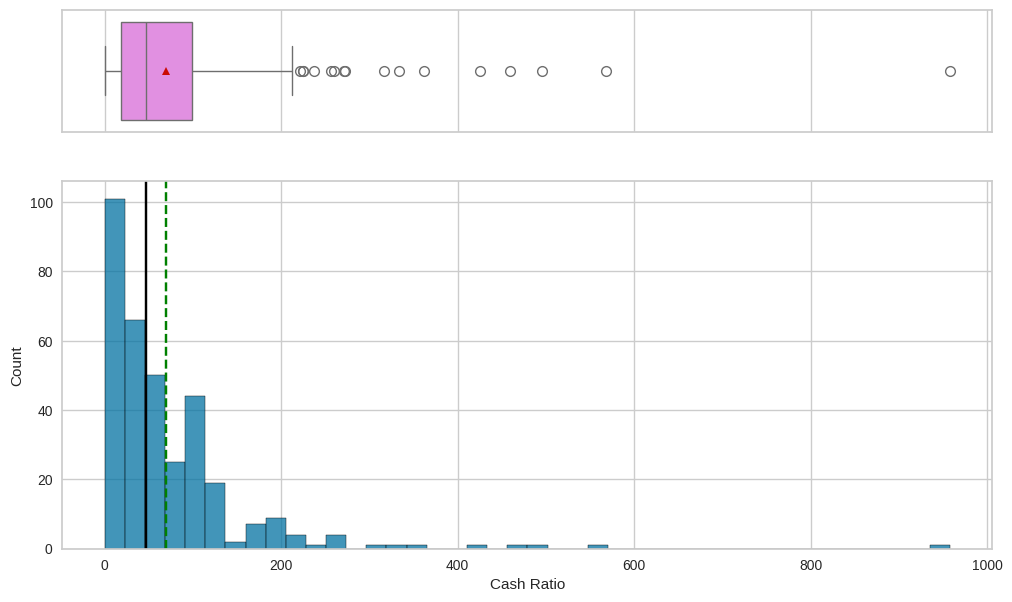

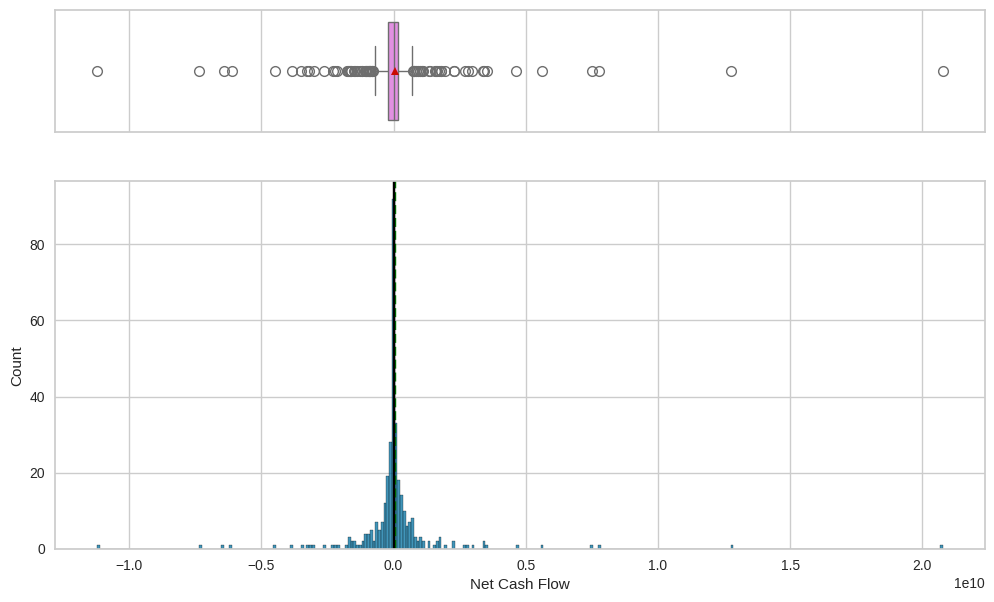

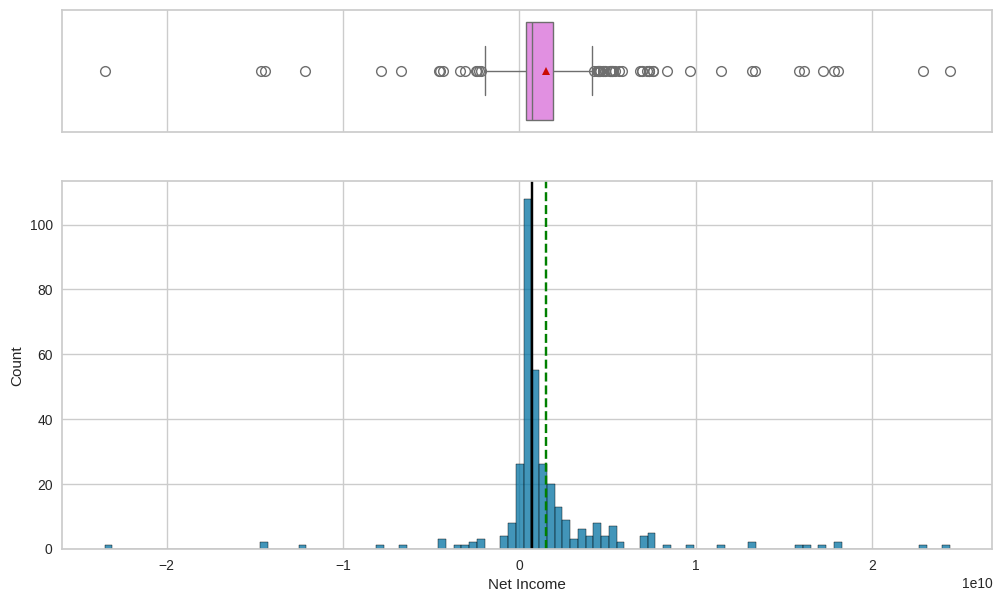

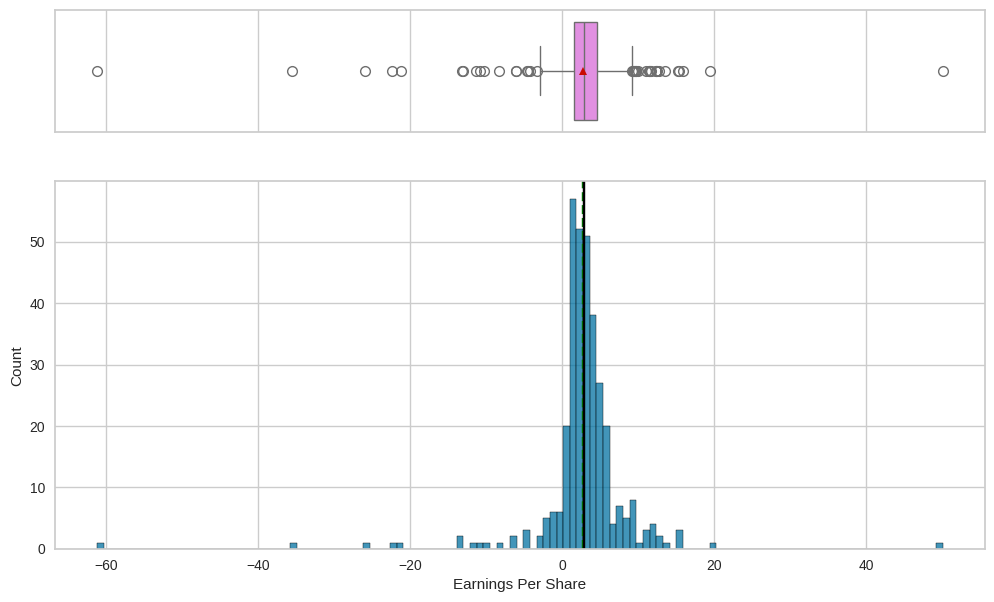

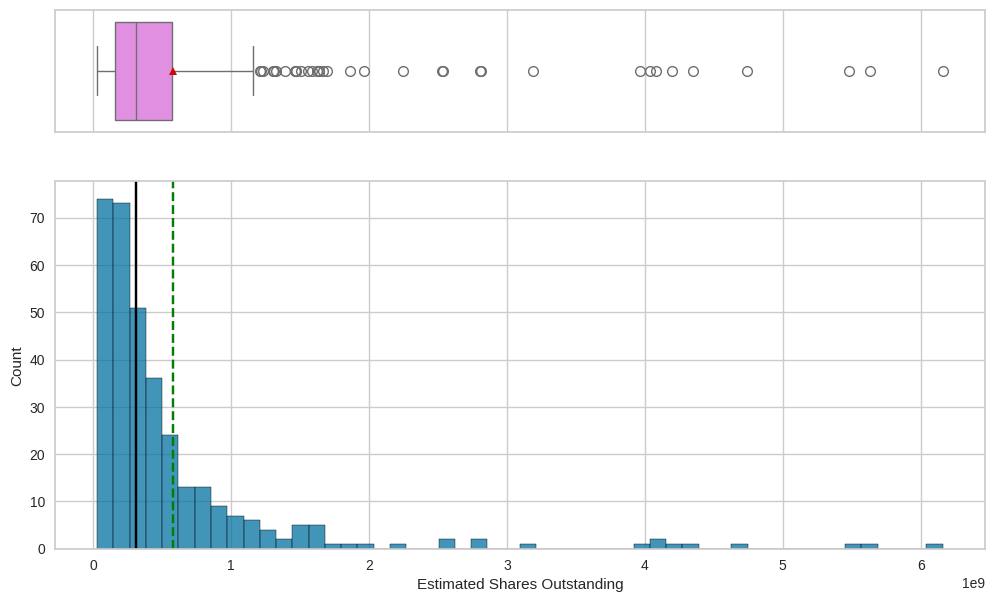

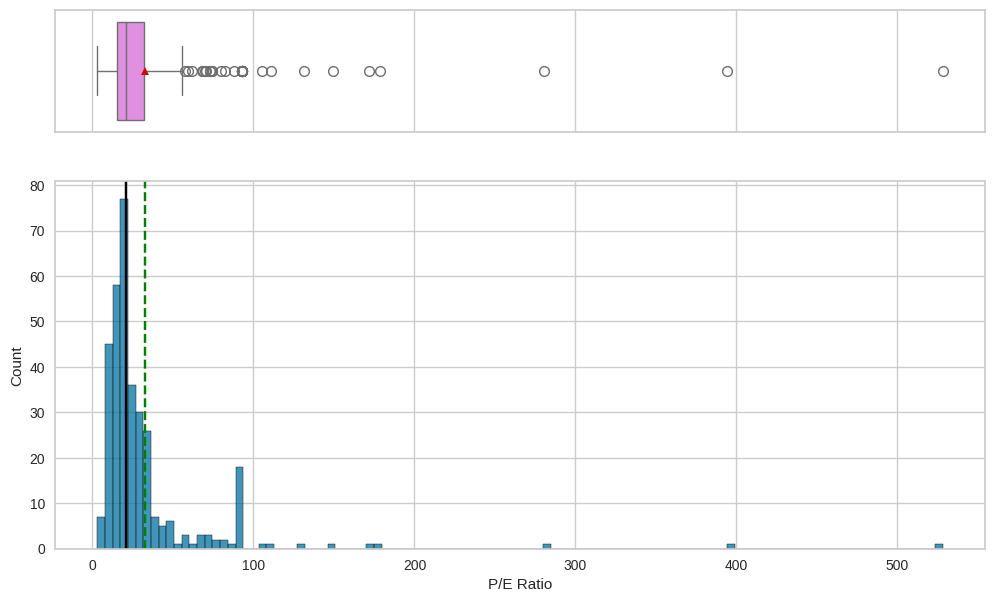

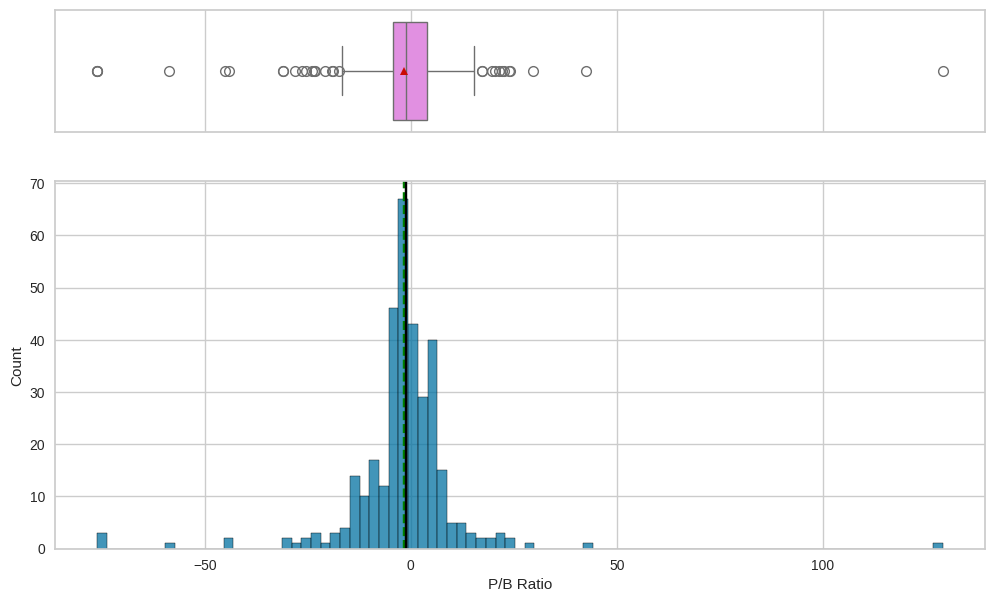

In [ ]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(df, item)

* Current price is skewed to the right.
* Price change has a normal distribution wwith outliers present on both sides of a median.
* Volatility is skewed to the right with plenty of outliers to the right.
* ROE is skewed to the right with mostbeing under 200.
* Cash ratio is skewed to the right
* Net cash Flow has a normal distribution with most values existing between -.5 and .5.
* Net Cash Flow, Net Income, and Earnings Per Share have a normal distributon with outliers existing to the left and the right of the median.
* Estimated Shares Outstanding is skewed to the right with most outliers existing to the right of the median. Most estimated shares outstanding are between 0 and 1.
* P/E Ratio is skewed to the right with outliers existing to the right of the median.
* P/B Ratio is normally distributed with most values existing between -50 and 50.


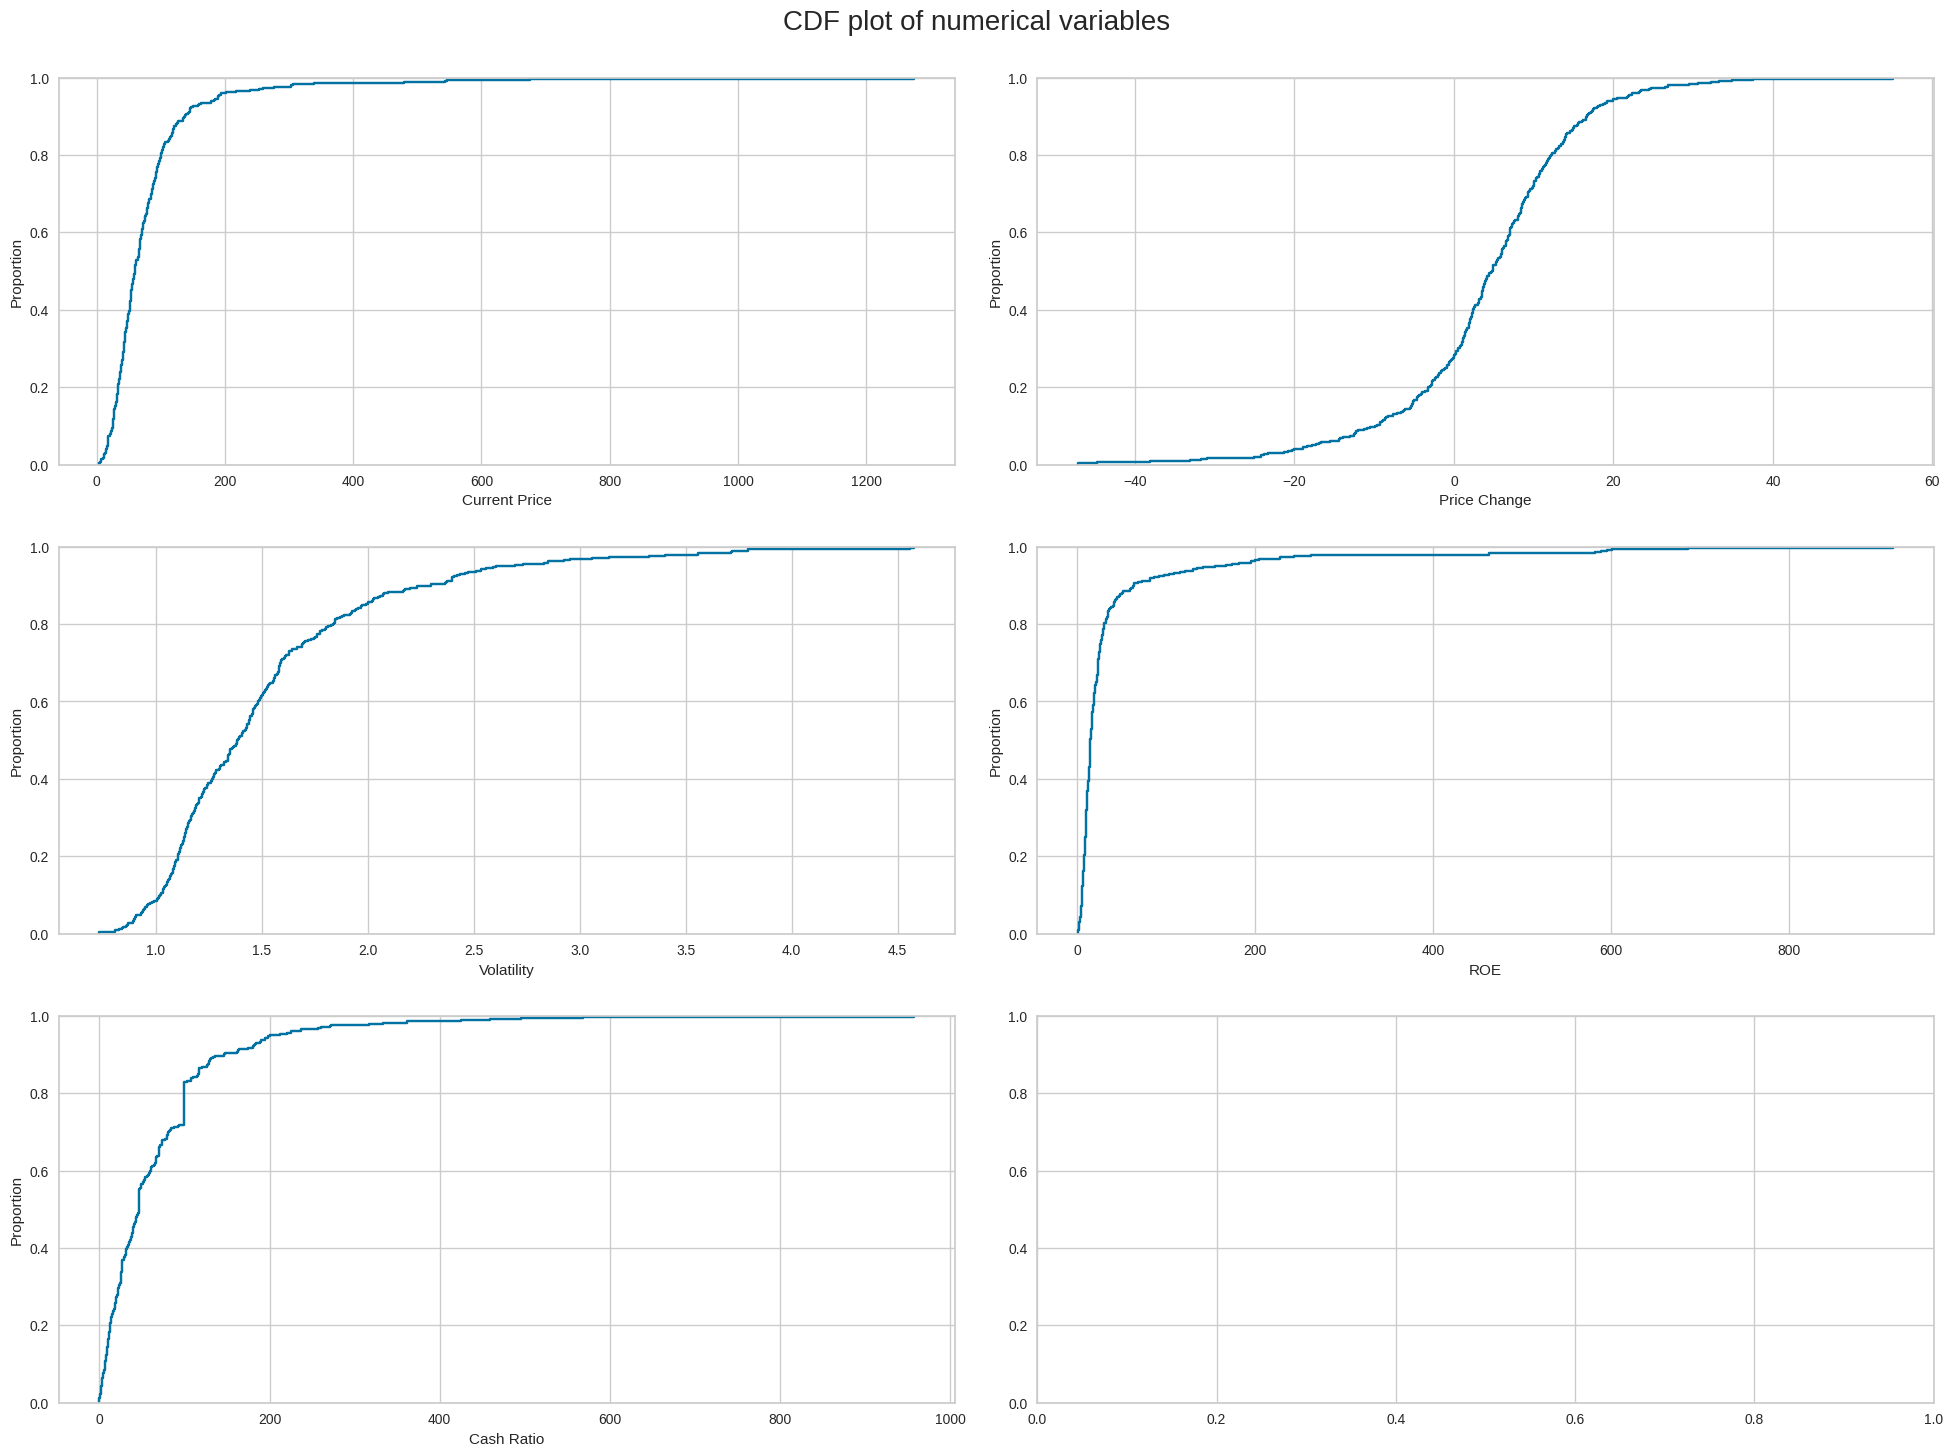

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=df[num_col[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=df[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

**Current Price:** The distribution appears right-skewed, with a larger concentration of lower prices.

**Price Change:** The distribution is centered around zero, with a symmetric spread of positive and negative changes.

**Volatility:** The distribution is right-skewed, indicating a larger proportion of lower volatility values.

**HOL:** The distribution is concentrated towards the lower end, with a few outliers towards higher values.

**Cash Ratio:** The distribution is right-skewed, with a majority of data points concentrated in the lower range.

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<ipython-input-19-8ddd29817a37>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


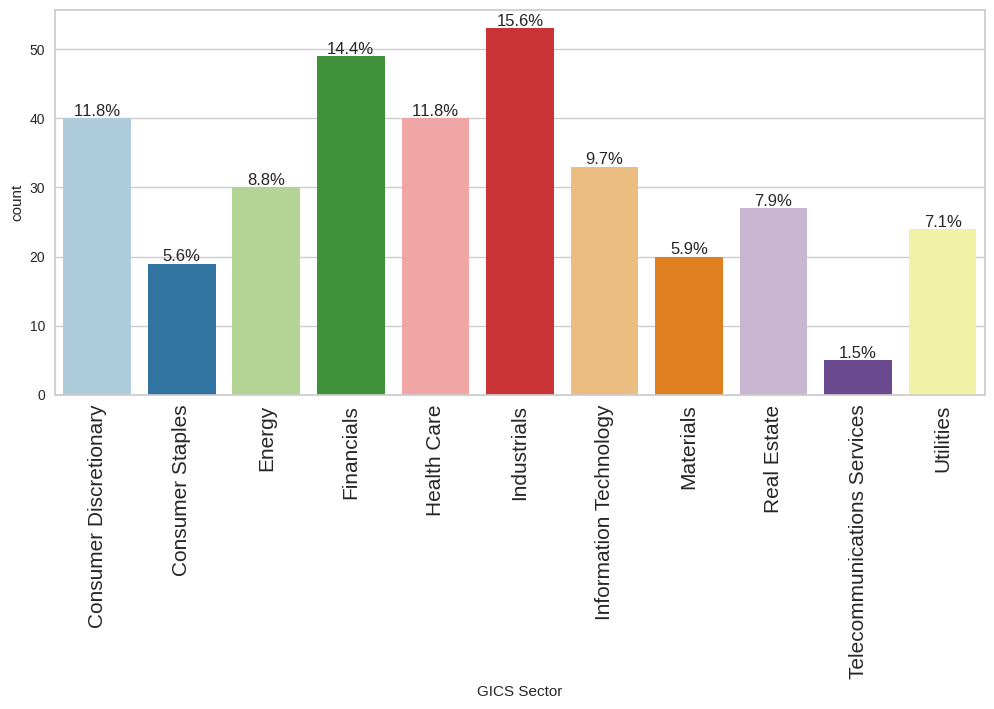

In [ ]:
labeled_barplot(df, "GICS Sector", perc=True)

Industrials, Financials,Consumer Discretionary and Health Care lead as the most frequent industries whereas Consumer Staples, Matearials and Telecommunication Services are the least frequent sectors.

<ipython-input-19-8ddd29817a37>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


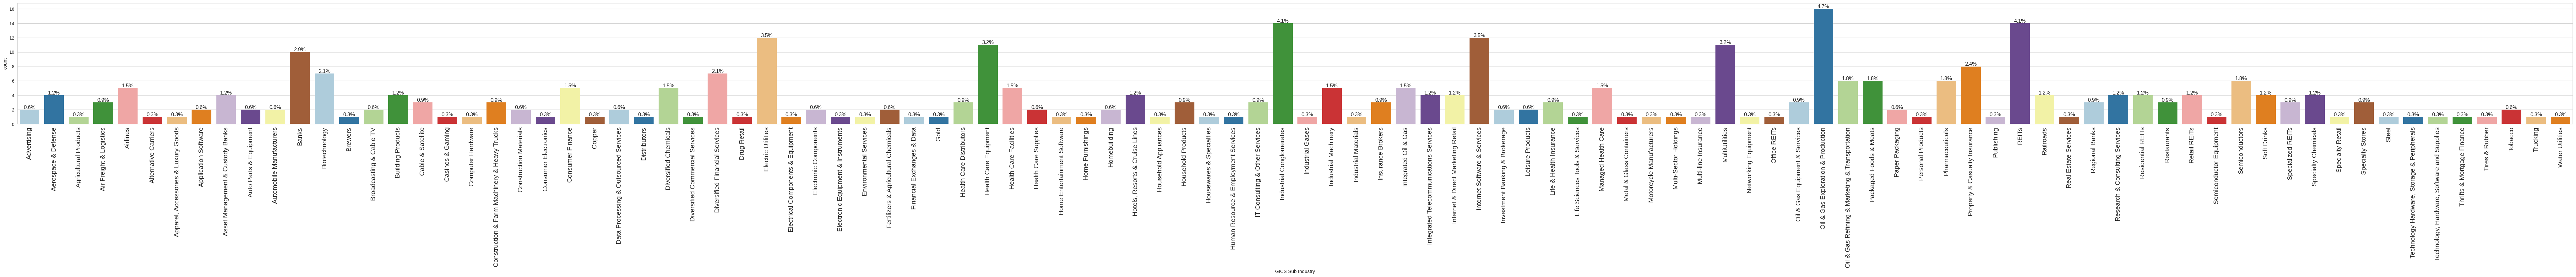

In [ ]:
labeled_barplot(df, "GICS Sub Industry", perc=True)

<ipython-input-22-ecd00dda9e21>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sector_price_change, y=sector_price_change.index, palette='viridis')


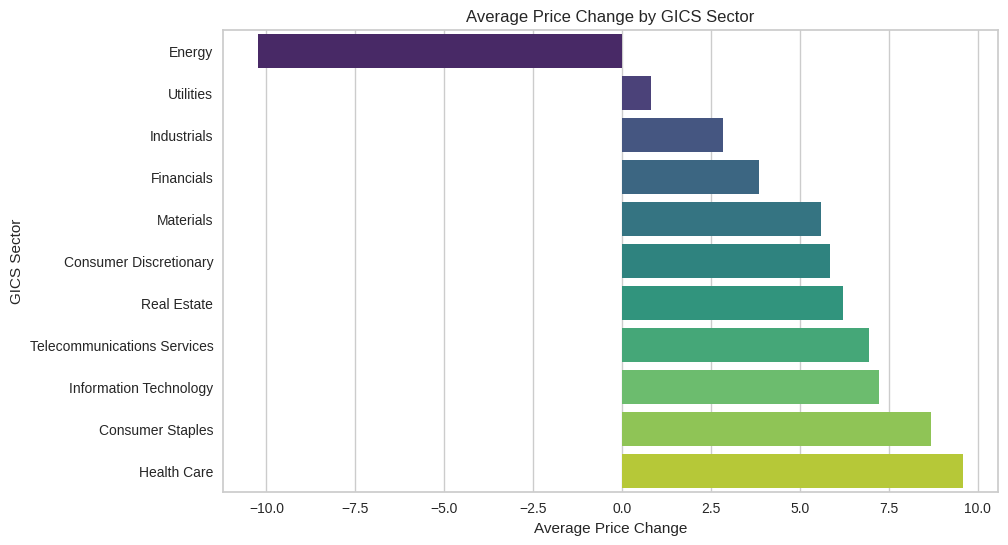

The sector with the greatest average price increase is: Health Care
The average price increase for this sector is: 9.585651574425
The sector with the greatest average price decrease is: Energy
The average price decrease for this sector is: -10.228288733833333


In [ ]:
# Calculate the average price change for each sector
sector_price_change = df.groupby('GICS Sector')['Price Change'].mean().sort_values()

# Plot the average price change by sector
plt.figure(figsize=(10, 6))
sns.barplot(x=sector_price_change, y=sector_price_change.index, palette='viridis')
plt.title('Average Price Change by GICS Sector')
plt.xlabel('Average Price Change')
plt.ylabel('GICS Sector')
plt.show()

# Identify the sector with the greatest price increase
greatest_increase_sector = sector_price_change.idxmax()
greatest_increase_value = sector_price_change.max()
greatest_decrease_sector = sector_price_change.idxmin()
greatest_decrease_value = sector_price_change.min()

print(f"The sector with the greatest average price increase is: {greatest_increase_sector}")
print(f"The average price increase for this sector is: {greatest_increase_value}")
print(f"The sector with the greatest average price decrease is: {greatest_decrease_sector}")
print(f"The average price decrease for this sector is: {greatest_decrease_value}")

<ipython-input-23-513d6e2d8f11>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_pe_ratio, y=average_pe_ratio.index, palette='coolwarm')


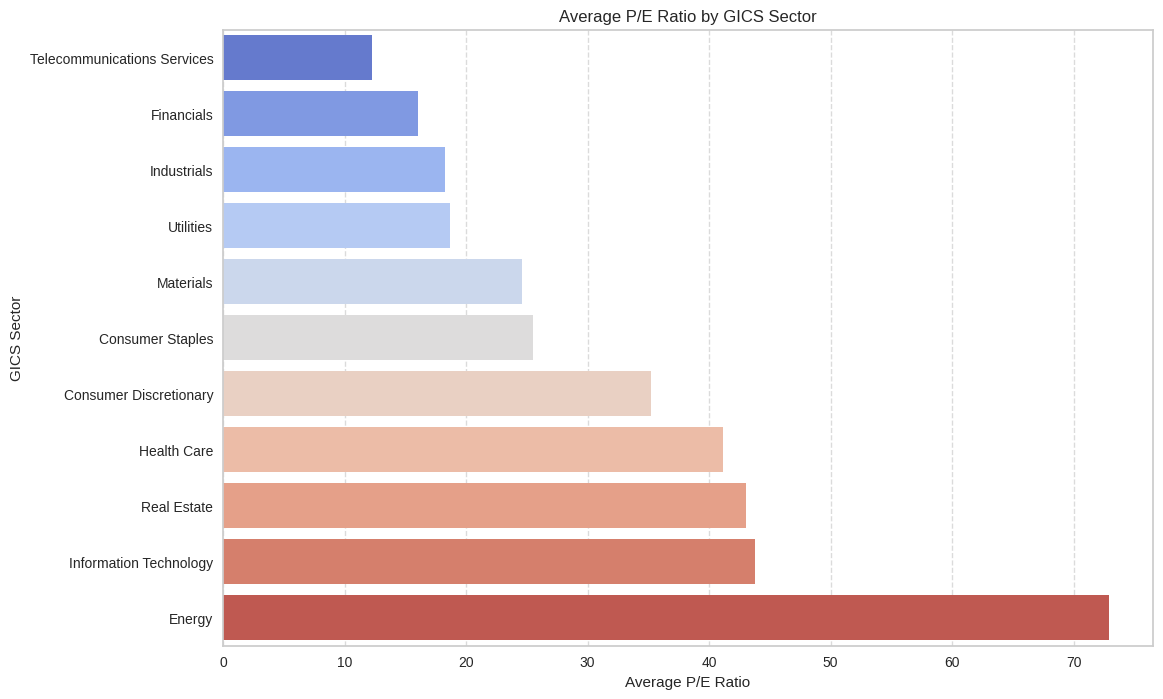

The average P/E ratio for Telecommunications Services is: 12.2226
The average P/E ratio for Financials is: 16.0232
The average P/E ratio for Industrials is: 18.2594
The average P/E ratio for Utilities is: 18.7194
The average P/E ratio for Materials is: 24.5854
The average P/E ratio for Consumer Staples is: 25.5212
The average P/E ratio for Consumer Discretionary is: 35.2116
The average P/E ratio for Health Care is: 41.1353
The average P/E ratio for Real Estate is: 43.0656
The average P/E ratio for Information Technology is: 43.7825
The average P/E ratio for Energy is: 72.8977


In [ ]:
#How does the P/E ratio vary, on average, across economic sectors
# Calculate the average P/E ratio for each GICS Sector
average_pe_ratio = df.groupby('GICS Sector')['P/E Ratio'].mean().sort_values()

# Plot the average P/E ratio by GICS Sector
plt.figure(figsize=(12, 8))
sns.barplot(x=average_pe_ratio, y=average_pe_ratio.index, palette='coolwarm')
plt.title('Average P/E Ratio by GICS Sector')
plt.xlabel('Average P/E Ratio')
plt.ylabel('GICS Sector')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Display the average P/E ratio values for each sector
for sector, avg_pe_ratio in average_pe_ratio.items():
    print(f"The average P/E ratio for {sector} is: {avg_pe_ratio:.4f}")


We can see that the greatest Average P/E ratios exist in the Energy, IT, Real Estate and Health Care Sectors. The lowest average P/E ratios exist in Telecommunications Services, Financials, Industrials and Utilities.

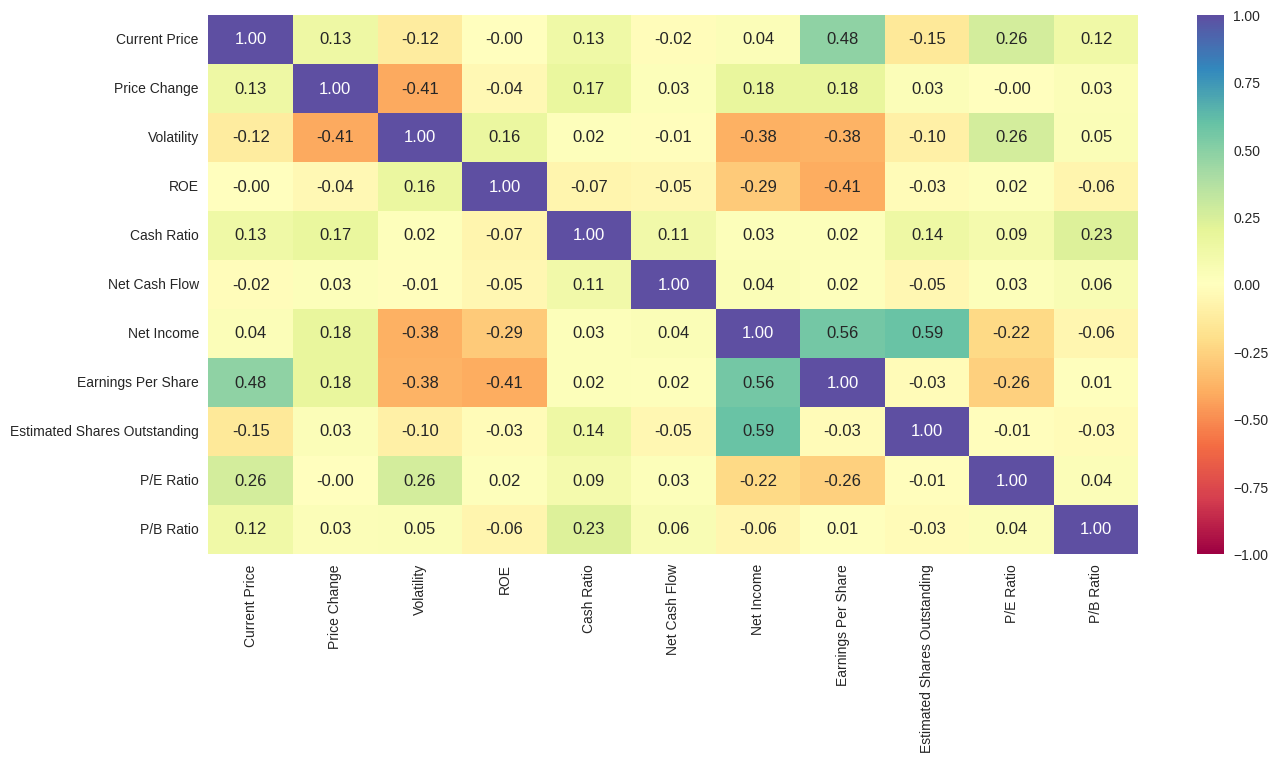

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

The greatest positive correlations exist between Estimated Shares Outstanding and Net Income with a correlation ratio of .59. Net Income and Earning per Share are also positively correlated with a ratio of .56.

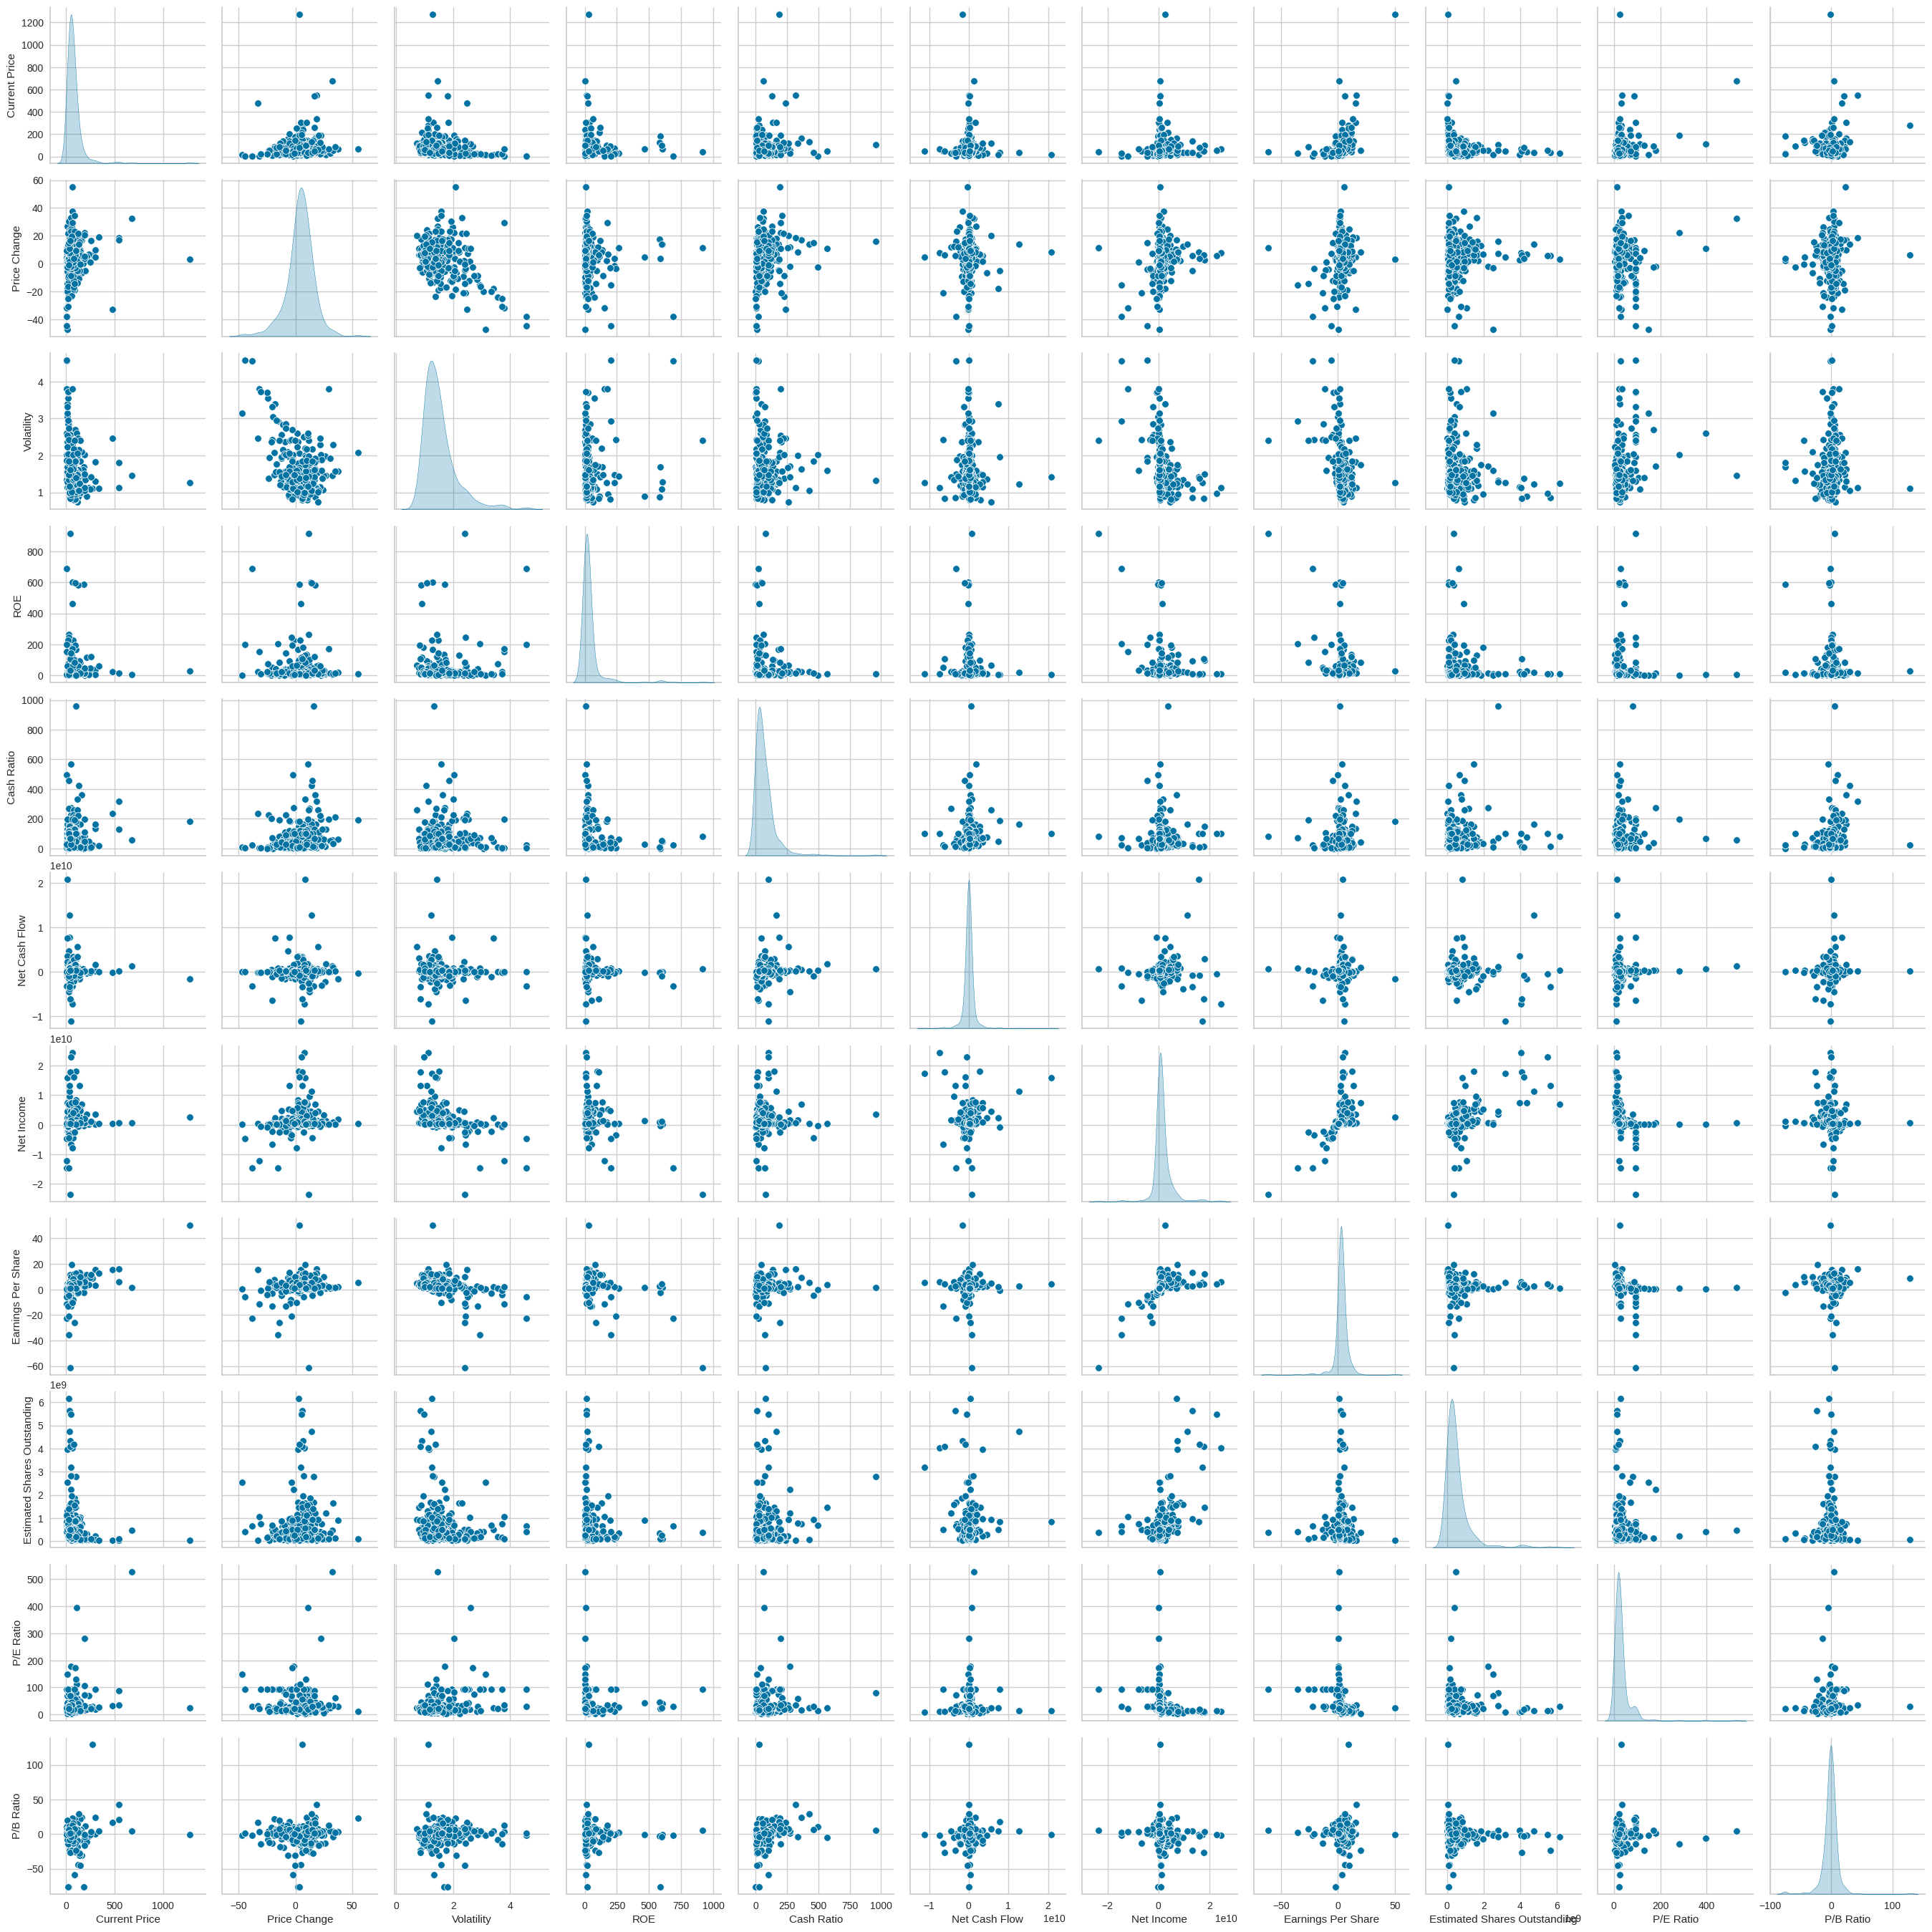

In [ ]:
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

* Most price changes occured when volatility was between 1 and 2
* We observe lower ROE regardless of cash flow
* The higher the income, the higher the earnings per share
* Most price changes ranged from -20 to 40 and had volatility between 0 and 2

<ipython-input-26-475c9db2a204>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_cash_ratio, y=average_cash_ratio.index, palette='Blues_d')


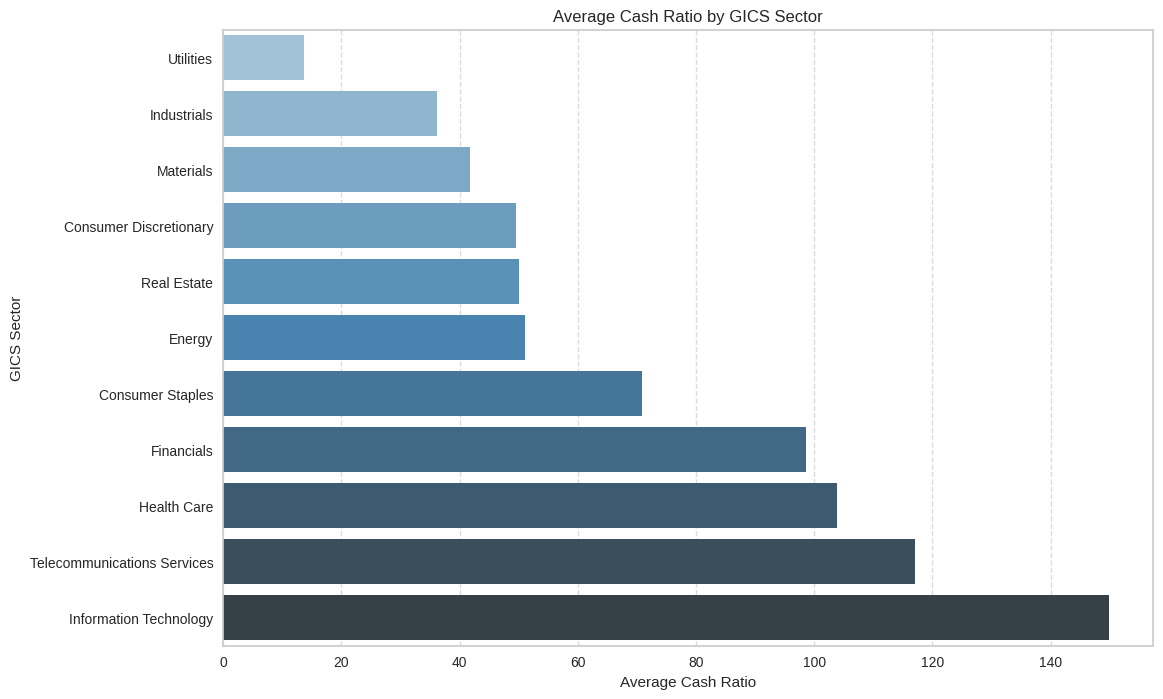

The average cash ratio for Utilities is: 13.62
The average cash ratio for Industrials is: 36.19
The average cash ratio for Materials is: 41.70
The average cash ratio for Consumer Discretionary is: 49.58
The average cash ratio for Real Estate is: 50.11
The average cash ratio for Energy is: 51.13
The average cash ratio for Consumer Staples is: 70.95
The average cash ratio for Financials is: 98.59
The average cash ratio for Health Care is: 103.78
The average cash ratio for Telecommunications Services is: 117.00
The average cash ratio for Information Technology is: 149.82


In [ ]:
# Calculate the average cash ratio for each GICS Sector
average_cash_ratio = df.groupby('GICS Sector')['Cash Ratio'].mean().sort_values()

# Plot the average cash ratio by GICS Sector
plt.figure(figsize=(12, 8))
sns.barplot(x=average_cash_ratio, y=average_cash_ratio.index, palette='Blues_d')
plt.title('Average Cash Ratio by GICS Sector')
plt.xlabel('Average Cash Ratio')
plt.ylabel('GICS Sector')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Display the average cash ratio values for each sector
for sector, avg_cash_ratio in average_cash_ratio.items():
    print(f"The average cash ratio for {sector} is: {avg_cash_ratio:.2f}")

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

In [ ]:
# variables used for clustering
num_col

['Current Price',
 'Price Change',
 'Volatility',
 'ROE',
 'Cash Ratio',
 'Net Cash Flow',
 'Net Income',
 'Earnings Per Share',
 'Estimated Shares Outstanding',
 'P/E Ratio',
 'P/B Ratio']

In [ ]:
# scaling the dataset before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [ ]:
# creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

In [ ]:
# Verify the mean and standard deviation of the scaled data
print("Mean after scaling:", np.mean(subset_scaled, axis=0))
print("Standard deviation after scaling:", np.std(subset_scaled, axis=0))
print("Scaled Data:\n", subset_scaled_df)

Mean after scaling: [ 7.83686841e-18 -2.87351842e-17 -7.96748288e-17  2.87351842e-17
 -8.09809736e-17  2.61228947e-18  1.04491579e-17  5.74703683e-17
 -1.04491579e-16  7.83686841e-18  2.61228947e-17]
Standard deviation after scaling: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Scaled Data:
      Current Price  Price Change  Volatility       ROE  Cash Ratio  \
0        -0.393341      0.493950    0.272749  0.989601   -0.210698   
1        -0.220837      0.355439    1.137045  0.937737    0.077269   
2        -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3         0.133567      0.825696   -0.284802 -0.317379    1.218059   
4        -0.260874     -0.492636    0.296470 -0.265515    2.237018   
..             ...           ...         ...       ...         ...   
335      -0.486181      0.901646    0.540121 -0.255142    4.308162   
336      -0.289510     -1.065766   -0.079703  1.062211   -0.476513   
337       0.221913      0.439539   -0.206067 -0.400362    0.332009   
338      -0.54705

In [ ]:
#plt.hist(subset_scaled_df['Fees'], edgecolor='black');


## EDA

- It is a good idea to explore the data once again after manipulating it.

## K-means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

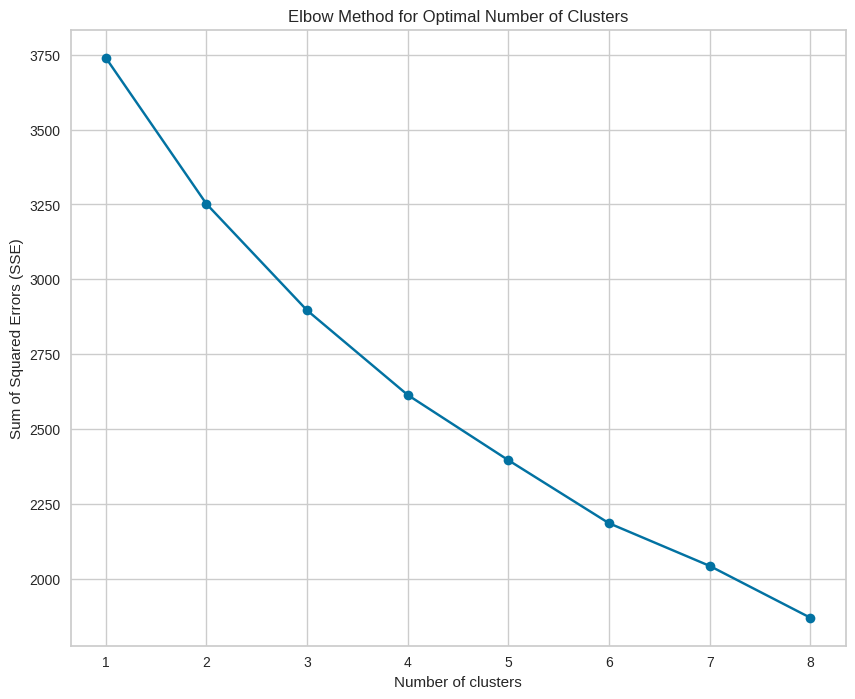

In [ ]:

# 1. determine how many clusters to build initially:
# Elbow Method to find the optimal number of clusters

sse = []  # create empty list to put all the SSE values for each cluster we will try with
range_n_clusters = range(1, 9)

for n_clusters in range_n_clusters:

    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(subset_scaled_df) # having learn the scaled data so it can determine the clustering grouping
    sse.append(kmeans.inertia_)
    # It is a measure of how internally coherent the clusters are.
    #Lower values of inertia indicate more tightly clustered data points, which usually implies better clustering performance.

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 8))
plt.plot(range_n_clusters, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show();



**The appropriate value of k from the elbow curve seems to be between 4 and 6.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2683105560042285
Number of Clusters: 4 	Average Distortion: 2.175554082632614
Number of Clusters: 5 	Average Distortion: 2.1219112607709603
Number of Clusters: 6 	Average Distortion: 2.0598763618226803
Number of Clusters: 7 	Average Distortion: 2.034440154192503
Number of Clusters: 8 	Average Distortion: 1.9672692838803143


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

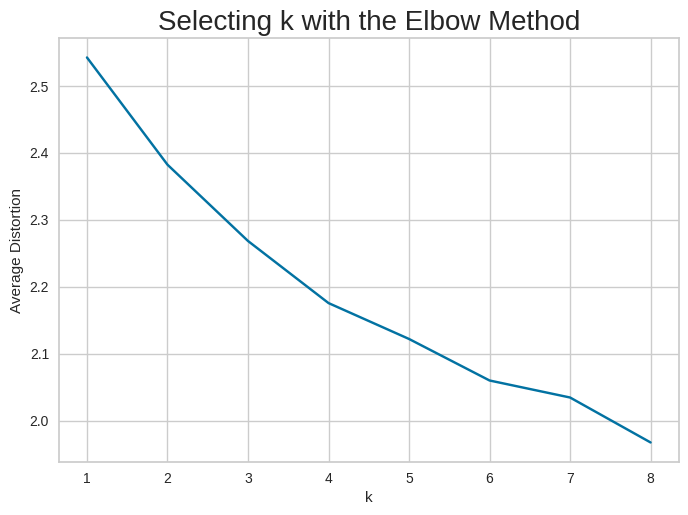

In [ ]:
clusters = range(1, 9)  #
meanDistortions = []  # empty list

for k in clusters:  # each cluster in range (1,9)
    model = KMeans(n_clusters=k) # define the Kmeans function
    model.fit(subset_scaled_df)  # fitting the model
    prediction = model.predict(subset_scaled_df)

    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

**Observing the elbow curve, the appropriate value of k seems to be 4 or 5 however there is a lack of a clear elbow within both graphs**

We explore the silhouette coefficient to evaluate cluster quality and identify the optimal k value



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

For n_clusters = 2, silhouette score is 0.43969639509980457
For n_clusters = 3, silhouette score is 0.465292959074158
For n_clusters = 4, silhouette score is 0.4495910932182279
For n_clusters = 5, silhouette score is 0.40219273904880043
For n_clusters = 6, silhouette score is 0.411674639259373
For n_clusters = 7, silhouette score is 0.4084552454873559
For n_clusters = 8, silhouette score is 0.3886929719130642
For n_clusters = 9, silhouette score is 0.13897392390235347


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


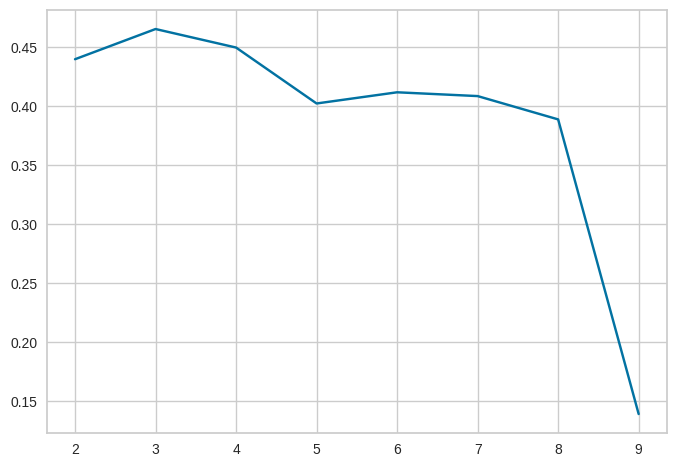

In [ ]:
sil_score = [] # saves the scores for each range:

cluster_list = list(range(2, 10)) # define the range of cluster

for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

While the silhouette score suggests that k=3 might be a good starting point, pairing the silhouette score with the elbow method will give us a clearer interpretation of a good fitting k value.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

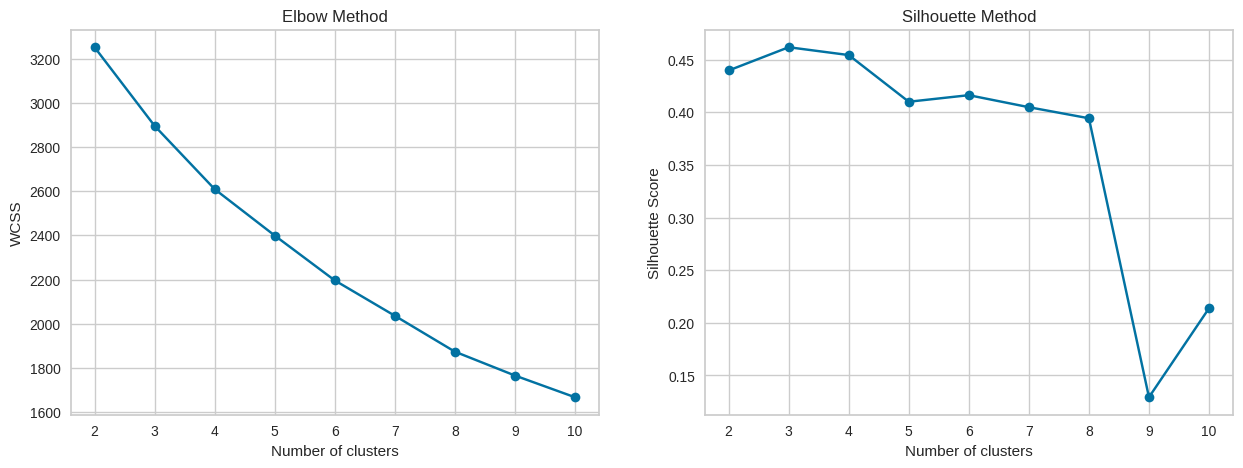

In [ ]:


# Elbow Method
wcss = []
silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(subset_scaled_df)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(subset_scaled_df, kmeans.labels_))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot WCSS for Elbow Method
ax1.plot(range(2, 11), wcss, marker='o')
ax1.set_title('Elbow Method')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('WCSS')

# Plot Silhouette Scores
ax2.plot(range(2, 11), silhouette_scores, marker='o')
ax2.set_title('Silhouette Method')
ax2.set_xlabel('Number of clusters')
ax2.set_ylabel('Silhouette Score')

plt.show();




In [ ]:
k_means_df = subset_scaled_df.copy()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.269236715539074
Number of Clusters: 4 	Average Distortion: 2.175554082632614
Number of Clusters: 5 	Average Distortion: 2.136852169310594
Number of Clusters: 6 	Average Distortion: 2.0713095032364506
Number of Clusters: 7 	Average Distortion: 1.9775989987671811
Number of Clusters: 8 	Average Distortion: 1.9652603012304684
Number of Clusters: 9 	Average Distortion: 1.9311613101229936
Number of Clusters: 10 	Average Distortion: 1.8502089919483544
Number of Clusters: 11 	Average Distortion: 1.8248014803579016
Number of Clusters: 12 	Average Distortion: 1.7525839358924045
Number of Clusters: 13 	Average Distortion: 1.722563828836958


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Number of Clusters: 14 	Average Distortion: 1.6925733787700508


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

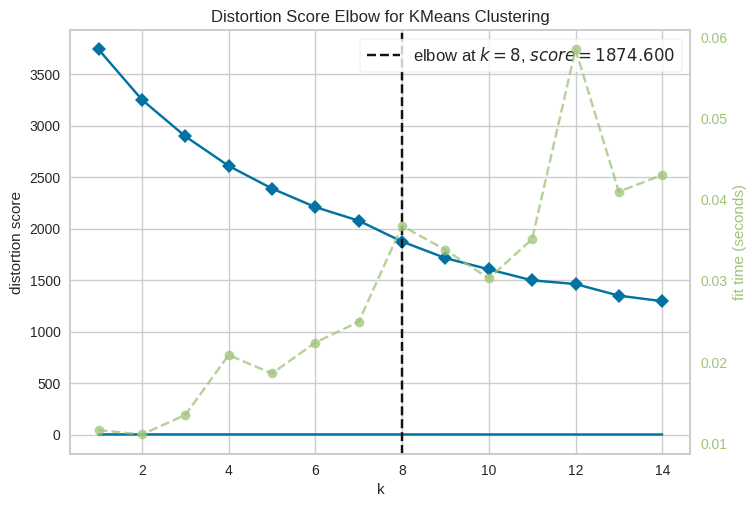

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
#plt.title("Selecting k with the Elbow Method", fontsize=20)
#plt.show()
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

**Distortion score is showing optimal k at 8.**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


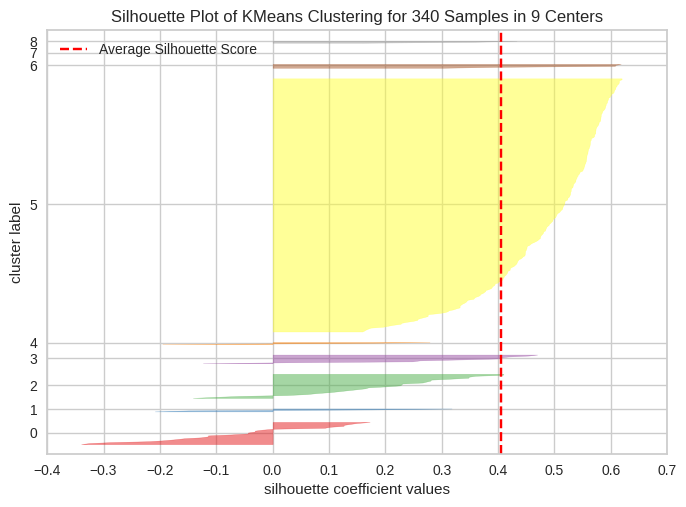

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(9, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show();

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


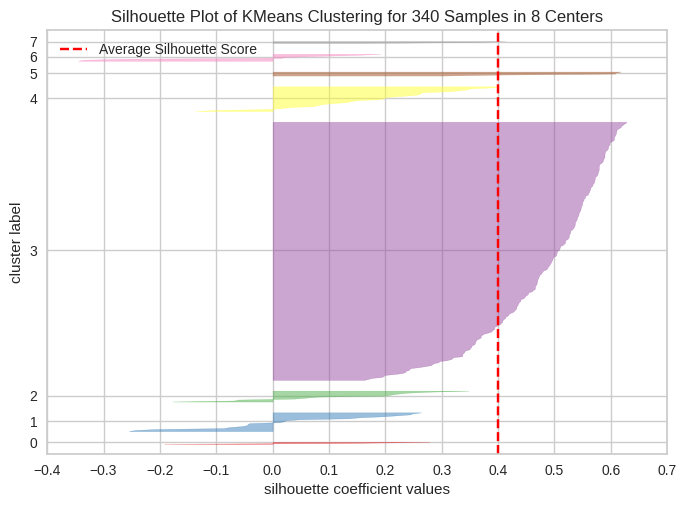

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show();

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


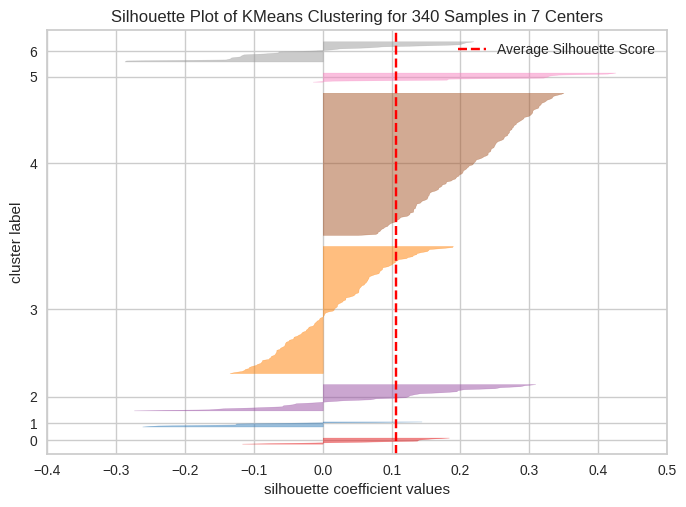

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show();

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


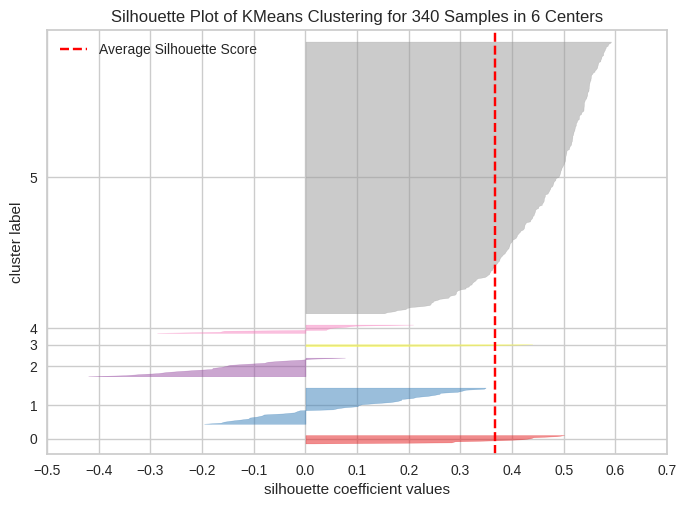

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


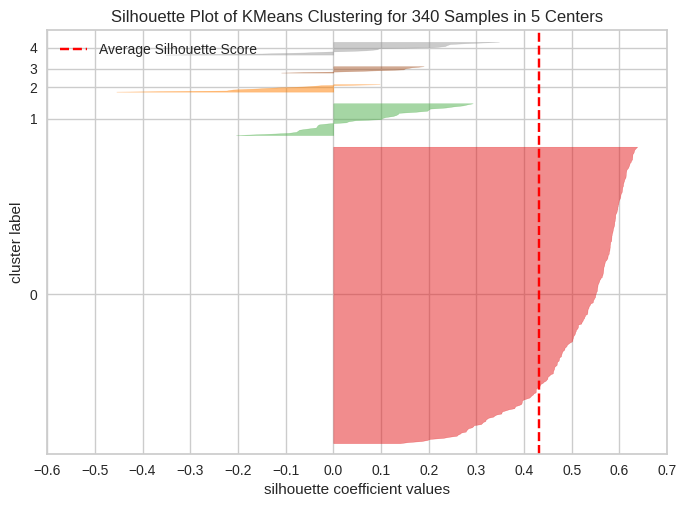

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


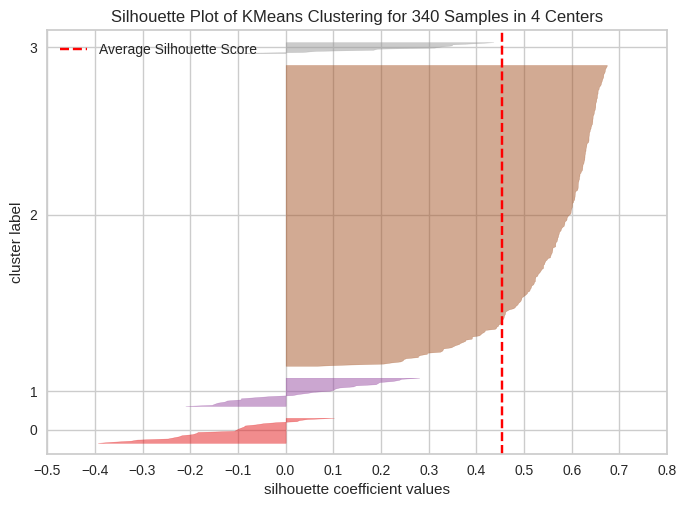

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

The silhouette plot indicates a better separation of clusters compared to 3, with a higher average silhouette score. However, there's still some overlap.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


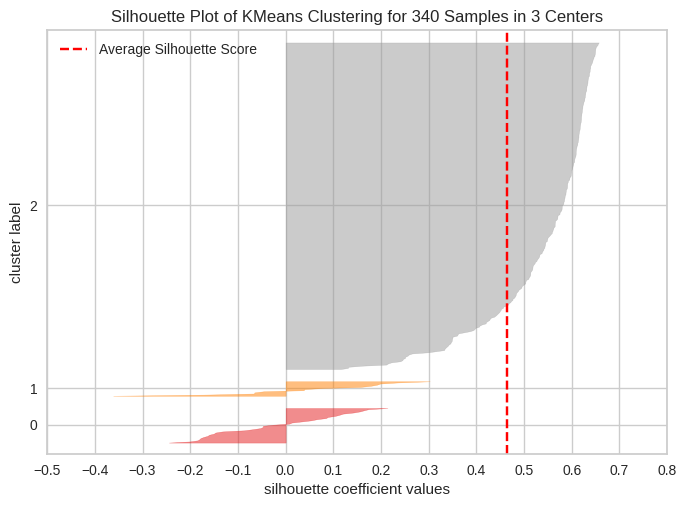

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show();

In [ ]:
# let's take 4 as number of clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(subset_scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

In [ ]:
# adding kmeans cluster labels to the original and scaled dataframes

df["K_means_segments"] = kmeans.labels_
subset_scaled_df["K_means_segments"] = kmeans.labels_

In [ ]:
#NEW
# Adding kmeans cluster labels to the numeric DataFrame
#subset_scaled_df['clusters'] = kmeans.labels_

In [ ]:
kmeans.labels_

array([0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       1, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 3, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 3, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
df.head(10)


GICS Sector                      GICS Sub Industry  \
0             Industrials                               Airlines   
1             Health Care                        Pharmaceuticals   
2             Health Care                  Health Care Equipment   
3  Information Technology                   Application Software   
4  Information Technology                         Semiconductors   
5        Consumer Staples                  Agricultural Products   
6  Information Technology  Data Processing & Outsourced Services   
7               Utilities                         MultiUtilities   
8               Utilities                     Electric Utilities   
9              Financials                Life & Health Insurance   

   Current Price  Price Change  Volatility  ROE  Cash Ratio  Net Cash Flow  \
0      42.349998      9.999995    1.687151  135          51     -604000000   
1      59.240002      8.339433    2.197887  130          77       51000000   
2      44.910000     11.301121    1.273646   21          67      938000000   
3      93.940002     13.977195    1.357679    9         180     -240840000   
4      55.320000     -1.827858    1.701169   14         272      315120000   
5      36.680000    -12.017268    1.516493   10          49     -189000000   
6     276.570007      6.189286    1.116976   30          25       90885000   
7      43.230000      2.174424    1.124186    9          14      287000000   
8      58.270000      2.371753    1.068485   11           9       13900000   
9      59.900002      3.027181    1.048295   14          99     -308000000   

   Net Income  Earnings Per Share  Estimated Shares Outstanding   P/E Ratio  \
0  7610000000               11.39                  6.681299e+08    3.718174   
1  5144000000                3.15                  1.633016e+09   18.806350   
2  4423000000                2.94                  1.504422e+09   15.275510   
3   629551000                1.26                  4.996437e+08   74.555557   
4   696878000                0.31                  2.247994e+09  178.451613   
5  1849000000                2.99                  6.183946e+08   12.267559   
6   596541000                8.91                  6.695185e+07   31.040405   
7   636000000                2.60                  2.446154e+08   16.626923   
8  2052300000                3.13                  4.218978e+08   18.456543   
9  2533000000                5.88                  4.307823e+08   10.187075   

    P/B Ratio  K_means_segments  
0   -8.784219                 0  
1   -8.750068                 0  
2   -0.394171                 0  
3    4.199651                 0  
4    1.059810                 2  
5    7.496831                 0  
6  129.064585                 2  
7   -0.719497                 0  
8   -3.022649                 0  
9   -1.883912                 0

In [ ]:
subset_scaled_df.head(10)
#only numeric

Current Price  Price Change  Volatility       ROE  Cash Ratio  \
0      -0.393341      0.493950    0.272749  0.989601   -0.210698   
1      -0.220837      0.355439    1.137045  0.937737    0.077269   
2      -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3       0.133567      0.825696   -0.284802 -0.317379    1.218059   
4      -0.260874     -0.492636    0.296470 -0.265515    2.237018   
5      -0.451251     -1.342556   -0.016049 -0.307006   -0.232849   
6       1.998837      0.176091   -0.692132 -0.099549   -0.498664   
7      -0.384353     -0.158797   -0.679931 -0.317379   -0.620496   
8      -0.230744     -0.142338   -0.774192 -0.296633   -0.675874   
9      -0.214096     -0.087667   -0.808359 -0.265515    0.320933   

   Net Cash Flow  Net Income  Earnings Per Share  \
0      -0.339355    1.554415            1.309399   
1      -0.002335    0.927628            0.056755   
2       0.454058    0.744371            0.024831   
3      -0.152497   -0.219816           -0.230563   
4       0.133564   -0.202703           -0.374982   
5      -0.125823    0.090133            0.032432   
6       0.018187   -0.228206            0.932390   
7       0.119096   -0.218177           -0.026856   
8      -0.021424    0.141806            0.053714   
9      -0.187053    0.263986            0.471769   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  K_means_segments  
0                      0.107863  -0.652487  -0.506653                 0  
1                      1.250274  -0.311769  -0.504205                 0  
2                      1.098021  -0.391502   0.094941                 0  
3                     -0.091622   0.947148   0.424333                 0  
4                      1.978399   3.293307   0.199196                 2  
5                      0.048977  -0.459427   0.660752                 0  
6                     -0.603923  -0.035502   9.377562                 2  
7                     -0.393572  -0.360984   0.071614                 0  
8                     -0.183672  -0.319668  -0.093530                 0  
9                     -0.173153  -0.506408  -0.011879                 0

Here we can see which segment or cluster that each data point belongs to.

In [ ]:
## Select only numeric columns for cluster profiling
#numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
#numeric_cols.append('K_means_segments')

In [ ]:
#NEW
# Creating the cluster profile in a new DataFrame by grouping and calculating the mean
cluster_profile = subset_scaled_df.groupby('K_means_segments').mean().reset_index()

In [ ]:
# Creating the cluster profile in a new DataFrame
#cluster_profile = df[numeric_cols].groupby("K_means_segments").mean().reset_index()

In [ ]:
cluster_profile

K_means_segments  Current Price  Price Change  Volatility       ROE  \
0                 0      -0.085714      0.081820   -0.232278 -0.050691   
1                 1      -0.466720     -1.707310    2.362790  0.740254   
2                 2       1.605651      0.786634    0.425607 -0.145189   
3                 3      -0.334583      0.164765   -0.612617 -0.125082   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0   -0.189229      -0.037849   -0.005820            0.129485   
1   -0.227737      -0.127531   -1.407113           -1.919388   
2    2.284422       0.358455   -0.140401            0.473229   
3    0.079825       0.369279    3.207781            0.179657   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
0                     -0.174155  -0.198802  -0.117403  
1                     -0.111790   1.046039   0.238856  
2                     -0.018469   1.300816   1.142249  
3                      3.956533  -0.372928  -0.181779

In [ ]:
cluster_profile = subset_scaled_df.groupby('K_means_segments').mean().reset_index()

# Counting the number of instances in each cluster
cluster_counts = df['K_means_segments'].value_counts().sort_index()

# Adding the counts to the cluster_profile DataFrame
cluster_profile['count_in_each_segments'] = cluster_counts.values

In [ ]:
print(cluster_profile)

   K_means_segments  Current Price  Price Change  Volatility       ROE  \
0                 0      -0.085714      0.081820   -0.232278 -0.050691   
1                 1      -0.466720     -1.707310    2.362790  0.740254   
2                 2       1.605651      0.786634    0.425607 -0.145189   
3                 3      -0.334583      0.164765   -0.612617 -0.125082   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0   -0.189229      -0.037849   -0.005820            0.129485   
1   -0.227737      -0.127531   -1.407113           -1.919388   
2    2.284422       0.358455   -0.140401            0.473229   
3    0.079825       0.369279    3.207781            0.179657   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  count_in_each_segments  
0                     -0.174155  -0.198802  -0.117403                     276  
1                     -0.111790   1.046039   0.238856                      26  
2                     -0.018469   1.300816   1.142249               

In [ ]:
# Adding the counts to the cluster_profile DataFrame
cluster_profile['count_in_each_segments'] = cluster_counts.values
cluster_profile

K_means_segments  Current Price  Price Change  Volatility       ROE  \
0                 0      -0.085714      0.081820   -0.232278 -0.050691   
1                 1      -0.466720     -1.707310    2.362790  0.740254   
2                 2       1.605651      0.786634    0.425607 -0.145189   
3                 3      -0.334583      0.164765   -0.612617 -0.125082   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0   -0.189229      -0.037849   -0.005820            0.129485   
1   -0.227737      -0.127531   -1.407113           -1.919388   
2    2.284422       0.358455   -0.140401            0.473229   
3    0.079825       0.369279    3.207781            0.179657   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  count_in_each_segments  
0                     -0.174155  -0.198802  -0.117403                     276  
1                     -0.111790   1.046039   0.238856                      26  
2                     -0.018469   1.300816   1.142249                      25  
3                      3.956533  -0.372928  -0.181779                      13

In [ ]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

* Cluster 0 is the most dense cluster
* The highest pricesare within cluster 2 where the mean is 1.606.
* Cluster 1 has the highest dispersion of stock prices reflecting high volatility. This cluster also has the highest return on equity- possessiong high profitability.
* The highest cash flow is within cluster 3.
* The lowest earnings Per Share exist within cluster 1




In [ ]:
# Calculate min and max for each cluster and each variable
min_values = subset_scaled_df.groupby('K_means_segments').min().reset_index()
max_values = subset_scaled_df.groupby('K_means_segments').max().reset_index()

# Combine the min and max into a range
range_df = min_values.copy()
for column in subset_scaled_df.columns:
    if column != 'K_means_segments':  # Skip the clustering column itself
        range_df[column] = min_values[column].astype(str) + " - " + max_values[column].astype(str)

# Now we have a DataFrame with ranges
range_df = range_df.drop(columns='K_means_segments')  # We already have K_means_segments in cluster_profile

# Adding range information to the cluster profile
for column in range_df.columns:
    cluster_profile[column + "_range"] = range_df[column]

# Displaying the cluster profile with ranges
cluster_profile.style.highlight_max(color="lightgreen", axis=0)


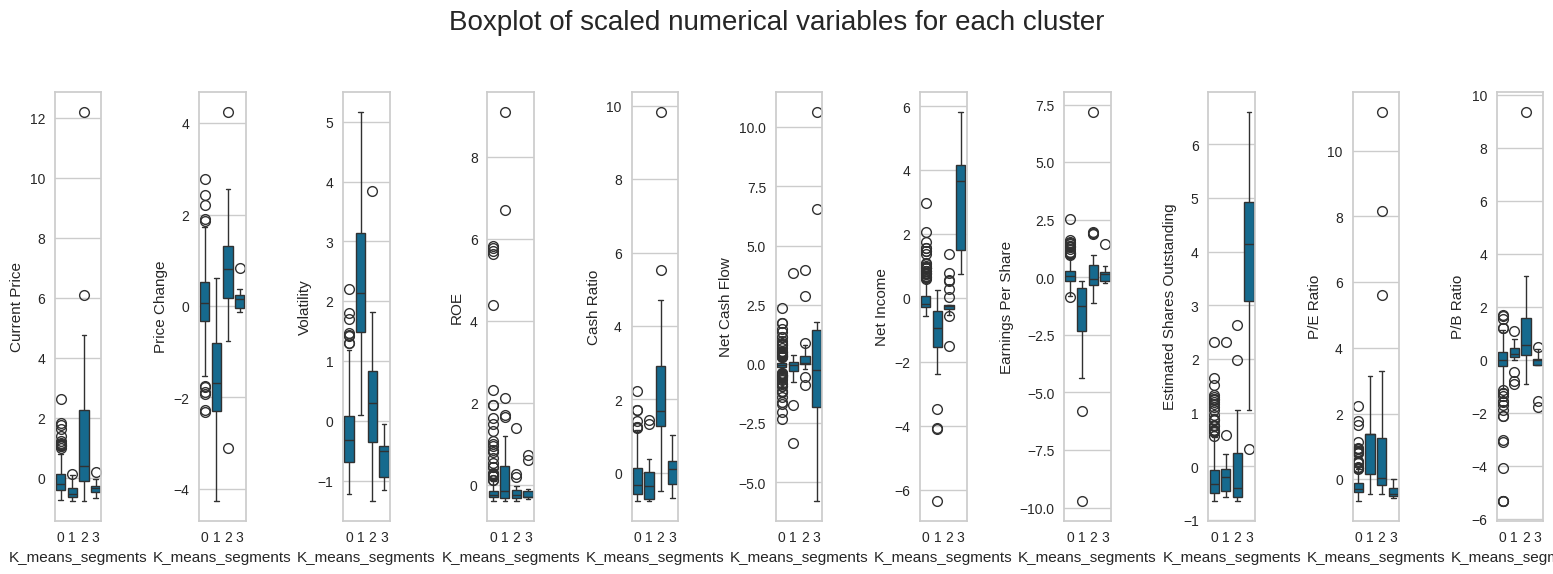

In [ ]:
fig, axes = plt.subplots(1, 11, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(11):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_df[num_col[counter]],
        x=subset_scaled_df["K_means_segments"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

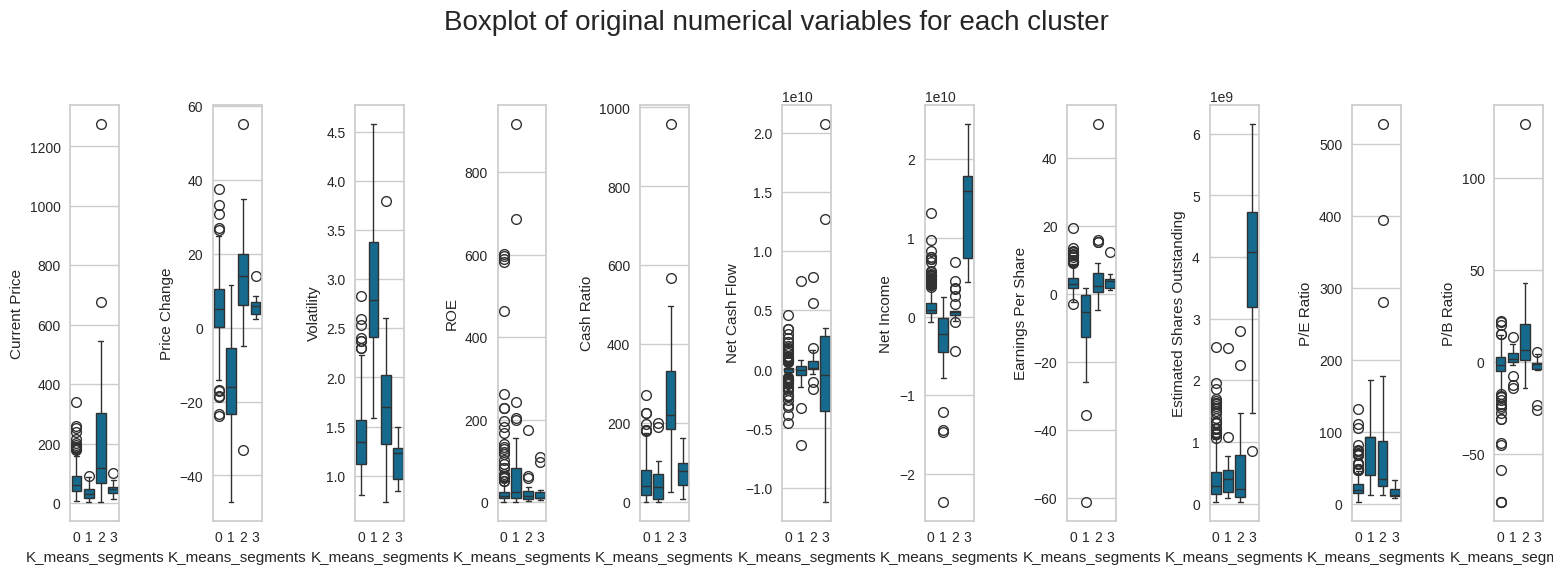

In [ ]:
fig, axes = plt.subplots(1, 11, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(11):
    sns.boxplot(ax=axes[ii], y=df[num_col[counter]], x=df["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

In [ ]:
pd.crosstab(df['K_means_segments'], df['GICS Sector']).style.highlight_max(color="lightgreen", axis=0)


In [ ]:
pd.crosstab(df['K_means_segments'], df['GICS Sub Industry']).style.highlight_max(color="lightgreen", axis=0)


**Lets shake things up a bit and and work with 8 clusters**




In [ ]:
# let's take 4 as number of clusters
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans.fit(subset_scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(random_state=0)

In [ ]:
# adding kmeans cluster labels to the original and scaled dataframes

df["K_means_segments"] = kmeans.labels_
subset_scaled_df["K_means_segments"] = kmeans.labels_

In [ ]:
kmeans.labels_

array([2, 2, 2, 2, 1, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 4, 2, 2,
       2, 1, 2, 2, 4, 2, 2, 2, 5, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 5, 2, 6, 2,
       2, 6, 2, 2, 7, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 3,
       1, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 7, 2, 2, 2, 2,
       2, 0, 2, 6, 3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 0, 3, 2, 2, 3,
       2, 2, 3, 2, 2, 1, 4, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2,
       2, 7, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       7, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 2, 2, 3, 2,
       2, 0, 2, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
df.head(10)


GICS Sector                      GICS Sub Industry  \
0             Industrials                               Airlines   
1             Health Care                        Pharmaceuticals   
2             Health Care                  Health Care Equipment   
3  Information Technology                   Application Software   
4  Information Technology                         Semiconductors   
5        Consumer Staples                  Agricultural Products   
6  Information Technology  Data Processing & Outsourced Services   
7               Utilities                         MultiUtilities   
8               Utilities                     Electric Utilities   
9              Financials                Life & Health Insurance   

   Current Price  Price Change  Volatility  ROE  Cash Ratio  Net Cash Flow  \
0      42.349998      9.999995    1.687151  135          51     -604000000   
1      59.240002      8.339433    2.197887  130          77       51000000   
2      44.910000     11.301121    1.273646   21          67      938000000   
3      93.940002     13.977195    1.357679    9         180     -240840000   
4      55.320000     -1.827858    1.701169   14         272      315120000   
5      36.680000    -12.017268    1.516493   10          49     -189000000   
6     276.570007      6.189286    1.116976   30          25       90885000   
7      43.230000      2.174424    1.124186    9          14      287000000   
8      58.270000      2.371753    1.068485   11           9       13900000   
9      59.900002      3.027181    1.048295   14          99     -308000000   

   Net Income  Earnings Per Share  Estimated Shares Outstanding   P/E Ratio  \
0  7610000000               11.39                  6.681299e+08    3.718174   
1  5144000000                3.15                  1.633016e+09   18.806350   
2  4423000000                2.94                  1.504422e+09   15.275510   
3   629551000                1.26                  4.996437e+08   74.555557   
4   696878000                0.31                  2.247994e+09  178.451613   
5  1849000000                2.99                  6.183946e+08   12.267559   
6   596541000                8.91                  6.695185e+07   31.040405   
7   636000000                2.60                  2.446154e+08   16.626923   
8  2052300000                3.13                  4.218978e+08   18.456543   
9  2533000000                5.88                  4.307823e+08   10.187075   

    P/B Ratio  K_means_segments  
0   -8.784219                 2  
1   -8.750068                 2  
2   -0.394171                 2  
3    4.199651                 2  
4    1.059810                 1  
5    7.496831                 2  
6  129.064585                 7  
7   -0.719497                 2  
8   -3.022649                 2  
9   -1.883912                 2

In [ ]:
subset_scaled_df.head(10)
#only numeric

Current Price  Price Change  Volatility       ROE  Cash Ratio  \
0      -0.393341      0.493950    0.272749  0.989601   -0.210698   
1      -0.220837      0.355439    1.137045  0.937737    0.077269   
2      -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3       0.133567      0.825696   -0.284802 -0.317379    1.218059   
4      -0.260874     -0.492636    0.296470 -0.265515    2.237018   
5      -0.451251     -1.342556   -0.016049 -0.307006   -0.232849   
6       1.998837      0.176091   -0.692132 -0.099549   -0.498664   
7      -0.384353     -0.158797   -0.679931 -0.317379   -0.620496   
8      -0.230744     -0.142338   -0.774192 -0.296633   -0.675874   
9      -0.214096     -0.087667   -0.808359 -0.265515    0.320933   

   Net Cash Flow  Net Income  Earnings Per Share  \
0      -0.339355    1.554415            1.309399   
1      -0.002335    0.927628            0.056755   
2       0.454058    0.744371            0.024831   
3      -0.152497   -0.219816           -0.230563   
4       0.133564   -0.202703           -0.374982   
5      -0.125823    0.090133            0.032432   
6       0.018187   -0.228206            0.932390   
7       0.119096   -0.218177           -0.026856   
8      -0.021424    0.141806            0.053714   
9      -0.187053    0.263986            0.471769   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  K_means_segments  
0                      0.107863  -0.652487  -0.506653                 2  
1                      1.250274  -0.311769  -0.504205                 2  
2                      1.098021  -0.391502   0.094941                 2  
3                     -0.091622   0.947148   0.424333                 2  
4                      1.978399   3.293307   0.199196                 1  
5                      0.048977  -0.459427   0.660752                 2  
6                     -0.603923  -0.035502   9.377562                 7  
7                     -0.393572  -0.360984   0.071614                 2  
8                     -0.183672  -0.319668  -0.093530                 2  
9                     -0.173153  -0.506408  -0.011879                 2

In [ ]:
cluster_profile = subset_scaled_df.groupby('K_means_segments').mean().reset_index()

# Counting the number of instances in each cluster
cluster_counts = df['K_means_segments'].value_counts().sort_index()

# Adding the counts to the cluster_profile DataFrame
cluster_profile['count_in_each_segments'] = cluster_counts.values

In [ ]:
print(cluster_profile)

   K_means_segments  Current Price  Price Change  Volatility       ROE  \
0                 0      -0.334583      0.164765   -0.612617 -0.125082   
1                 1       0.076034      0.948465    0.489986 -0.119142   
2                 2      -0.076278      0.078652   -0.243010 -0.149633   
3                 3      -0.465715     -1.689419    2.225863  0.105514   
4                 4       2.513965      1.488004    0.852517 -0.369243   
5                 5      -0.575803     -1.453888    3.311126  7.908297   
6                 6       0.280272      0.555489   -0.609690  5.462377   
7                 7       5.548088     -0.140367    0.053405 -0.178383   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0    0.079825       0.369279    3.207781            0.179657   
1    2.936629       0.369375   -0.150554           -0.125416   
2   -0.193919      -0.025147    0.002471            0.147482   
3   -0.242221      -0.098149   -1.021853           -1.412401   
4    0.398462

In [ ]:
# Adding the counts to the cluster_profile DataFrame
cluster_profile['count_in_each_segments'] = cluster_counts.values
cluster_profile

K_means_segments  Current Price  Price Change  Volatility       ROE  \
0                 0      -0.334583      0.164765   -0.612617 -0.125082   
1                 1       0.076034      0.948465    0.489986 -0.119142   
2                 2      -0.076278      0.078652   -0.243010 -0.149633   
3                 3      -0.465715     -1.689419    2.225863  0.105514   
4                 4       2.513965      1.488004    0.852517 -0.369243   
5                 5      -0.575803     -1.453888    3.311126  7.908297   
6                 6       0.280272      0.555489   -0.609690  5.462377   
7                 7       5.548088     -0.140367    0.053405 -0.178383   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0    0.079825       0.369279    3.207781            0.179657   
1    2.936629       0.369375   -0.150554           -0.125416   
2   -0.193919      -0.025147    0.002471            0.147482   
3   -0.242221      -0.098149   -1.021853           -1.412401   
4    0.398462       0.330693   -0.306744           -0.308093   
5   -0.210698      -0.693613   -5.236157           -6.778822   
6   -0.480943      -0.172008   -0.205168           -0.186781   
7    1.200338      -0.180598   -0.133367            2.507012   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  count_in_each_segments  
0                      3.956533  -0.372928  -0.181779                      13  
1                      0.246471   0.371740   0.818118                      18  
2                     -0.177823  -0.208711  -0.105970                     268  
3                     -0.112005   1.020803   0.239231                      26  
4                     -0.248951   8.318604  -0.258428                       3  
5                     -0.068025   0.635362   0.235430                       2  
6                     -0.269264   0.051630  -1.085094                       5  
7                     -0.614720   0.213143   3.109360                       5

* Cluster 2 is now the most dense cluster- with 268 instances. This cluster has a mean estimated of -1.689 having the lowest price change
* The most undervalued stocks (P/B Ratio) occur in the 5 instances in cluster 6.
* The 2 instances that belong in cluster 5 have the lowest earnings per share.


In [ ]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

* Stocks in cluster 1 tend to be the most liquid companies with the highest cash flows(Cash Ratio and Net Cash Flow)
* The highest amount of estimated shares outstanding occur in cluster 0, this cluster also includes stocks that produce the most net income.
* Cluster 5 is characterized as having a high dispertion of funds and high profit without needing increasing capital (Volatility and ROE)

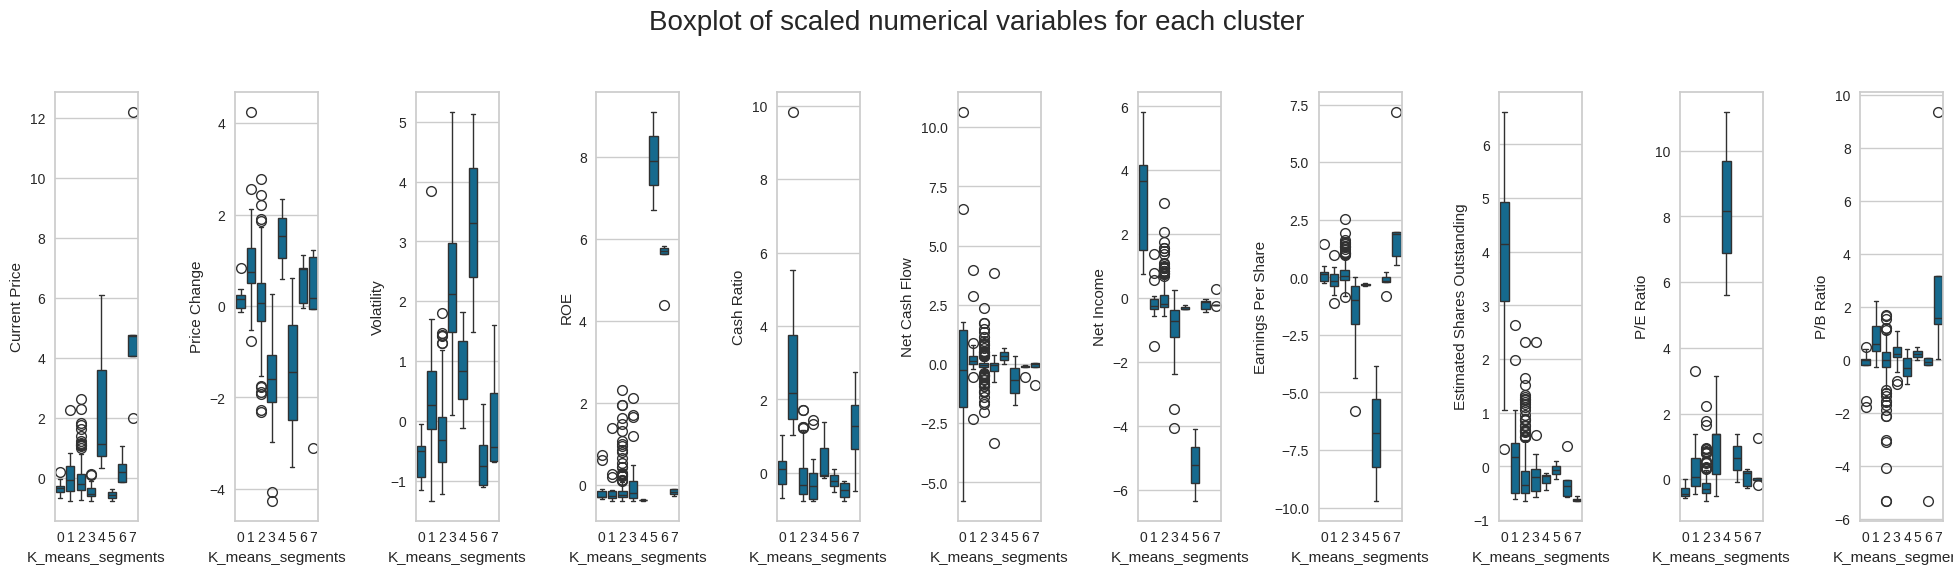

In [ ]:
fig, axes = plt.subplots(1, 11, figsize=(20, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(11):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_df[num_col[counter]],
        x=subset_scaled_df["K_means_segments"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

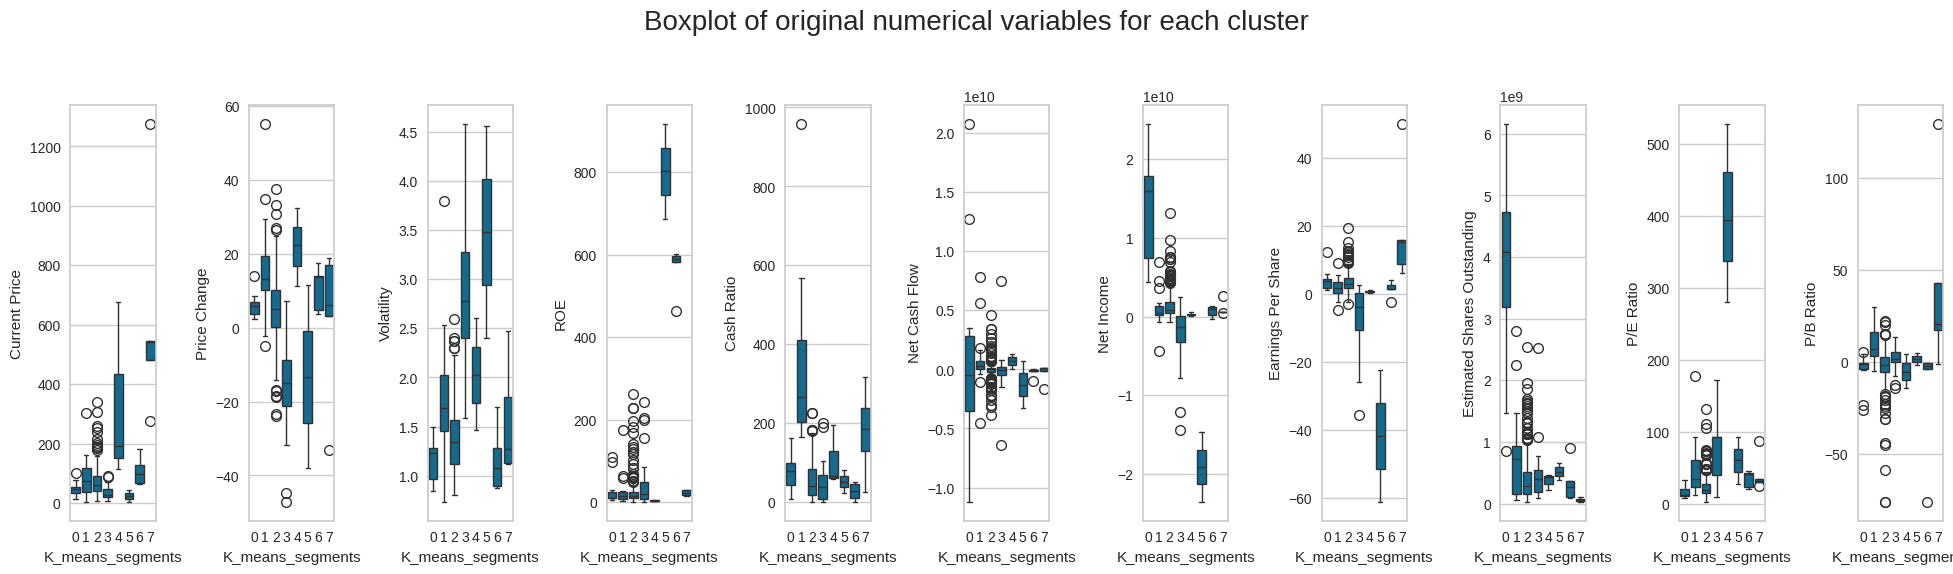

In [ ]:
fig, axes = plt.subplots(1, 11, figsize=(20, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(11):
    sns.boxplot(ax=axes[ii], y=df[num_col[counter]], x=df["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

* Relating to net income, cluster 0 tends to perform best
* Cluster 4 includes high priced stocks- prices not represented within other companies
* Cluster 3 and 5 are the most volatile


In [ ]:
pd.crosstab(df['K_means_segments'], df['GICS Sector']).style.highlight_max(color="lightgreen", axis=0)


In [ ]:
pd.crosstab(df['K_means_segments'], df['GICS Sub Industry']).style.highlight_max(color="lightgreen", axis=0)


Even though we increased the number of clusters to 8,the dominant clusters still include instances that are over 250.
Cluster zero includes the most varied economic sectors when k =4 , whereas cluster 2 includes most economic sectors when k=8.

 For this reason, we recommend reducing dimensionality to visually assess the distribution and seperation of clusters.

In [ ]:

pca_scaled_df = subset_scaled_df.drop(["K_means_segments"], axis=1)

pca_scaled_df.head()


Current Price  Price Change  Volatility       ROE  Cash Ratio  \
0      -0.393341      0.493950    0.272749  0.989601   -0.210698   
1      -0.220837      0.355439    1.137045  0.937737    0.077269   
2      -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3       0.133567      0.825696   -0.284802 -0.317379    1.218059   
4      -0.260874     -0.492636    0.296470 -0.265515    2.237018   

   Net Cash Flow  Net Income  Earnings Per Share  \
0      -0.339355    1.554415            1.309399   
1      -0.002335    0.927628            0.056755   
2       0.454058    0.744371            0.024831   
3      -0.152497   -0.219816           -0.230563   
4       0.133564   -0.202703           -0.374982   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
0                      0.107863  -0.652487  -0.506653  
1                      1.250274  -0.311769  -0.504205  
2                      1.098021  -0.391502   0.094941  
3                     -0.091622   0.947148   0.424333  
4                      1.978399   3.293307   0.199196

In [ ]:


# Assuming X is your data matrix
#pca = PCA().fit(pca_scaled_df)


pca = PCA()
pca.fit(pca_scaled_df)


# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 90% of the variance
#  + 1 below: Indices in Python are 0-based, meaning they start from 0. However, when we talk about the number of components, we count from 1.
num_components = np.argmax(cumulative_variance >= 0.90) + 1
print(f'Number of components explaining 90% of the variance: {num_components}')


Number of components explaining 90% of the variance: 8


In [ ]:
# Fit PCA with the optimal number of components
pca_opt = PCA(n_components=num_components).fit(pca_scaled_df)

# Loadings (coefficients) for the selected components
loadings = pca_opt.components_

# You can transpose this to match components to original features
loadings = loadings.T



# Assuming your feature names are in a list called 'feature_names'
feature_names = pca_scaled_df.columns.tolist()

loadings_df = pd.DataFrame(loadings, index=feature_names, columns=[f'PC{i+1}' for i in range(num_components)])
print(loadings_df)


                                   PC1       PC2       PC3       PC4  \
Current Price                -0.183358  0.577405 -0.177707 -0.009003   
Price Change                 -0.276668  0.188157  0.046465  0.659718   
Volatility                    0.429196  0.041011  0.182838 -0.386645   
ROE                           0.301065 -0.062581  0.004737  0.534317   
Cash Ratio                   -0.084171  0.327737  0.539192  0.083815   
Net Cash Flow                -0.033688  0.128003  0.185502 -0.136556   
Net Income                   -0.510910 -0.251558  0.209188 -0.121013   
Earnings Per Share           -0.503367  0.184332 -0.275313 -0.260114   
Estimated Shares Outstanding -0.221208 -0.363275  0.581666  0.023336   
P/E Ratio                     0.208151  0.377363  0.249348 -0.003033   
P/B Ratio                    -0.009917  0.360796  0.295980 -0.145511   

                                   PC5       PC6       PC7       PC8  
Current Price                 0.392874  0.045399  0.345974  0.03

In [ ]:
# Calculate the importance of each feature
feature_importance = np.sum(np.abs(loadings_df), axis=1)

# Sort features by importance
sorted_features = feature_importance.sort_values(ascending=False)


# represents the cumulative importance of each feature across the selected principal components.
print("Features sorted by importance:")
print(sorted_features)


Features sorted by importance:
P/B Ratio                       2.377830
P/E Ratio                       2.296772
Net Cash Flow                   2.192054
Cash Ratio                      2.077793
Price Change                    1.800826
Estimated Shares Outstanding    1.783108
ROE                             1.781697
Current Price                   1.769573
Earnings Per Share              1.625242
Net Income                      1.591570
Volatility                      1.443891
dtype: float64


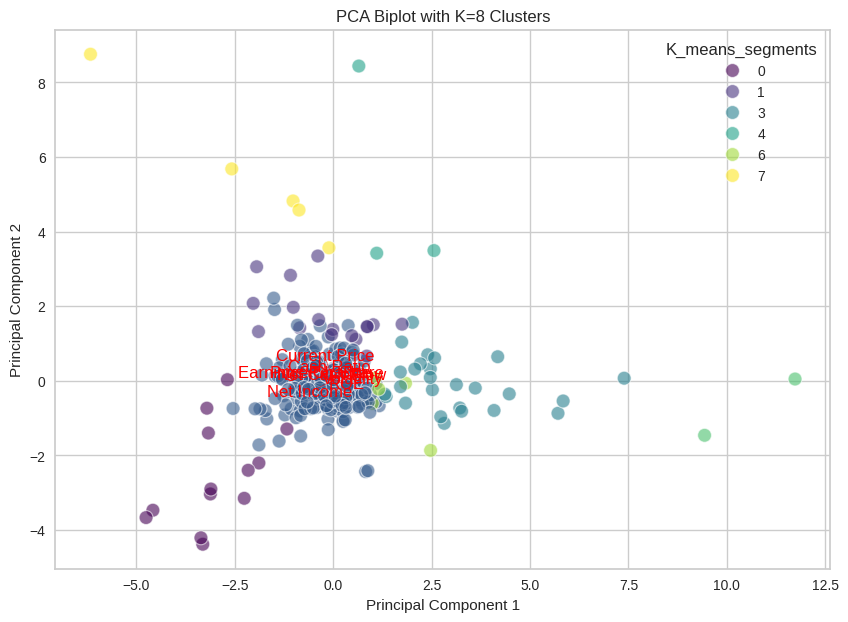

In [ ]:
# Fit PCA with 2 components for visualization purposes
pca_biplot = PCA(n_components=2)
pca_result = pca_biplot.fit_transform(pca_scaled_df)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['K_means_segments'] = subset_scaled_df['K_means_segments']

# Plotting
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='K_means_segments', data=pca_df, palette='viridis', s=100, alpha=0.6)

# Plot feature vectors
for i in range(loadings.shape[1]):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='red', alpha=0.5)
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, feature_names[i], color='red', ha='center', va='center')

plt.title('PCA Biplot with K=8 Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In [ ]:
# Set the number of clusters
k = 8

# Fit K-Means on the PCA-reduced data
kmeans_pca = KMeans(n_clusters=k, random_state=0)
kmeans_pca.fit(pca_df)
pca_clusters = kmeans_pca.fit_predict(pca_scaled_df)

# Add the cluster labels to the original DataFrame
subset_scaled_df['Cluster'] = kmeans_pca.labels_

# Add the K-Means cluster labels to the PCA DataFrame
pca_df['Cluster'] = kmeans_pca.labels_

# Optionally, add the cluster labels back to the original DataFrame
df['PCA_KMeans_Cluster'] = kmeans_pca.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


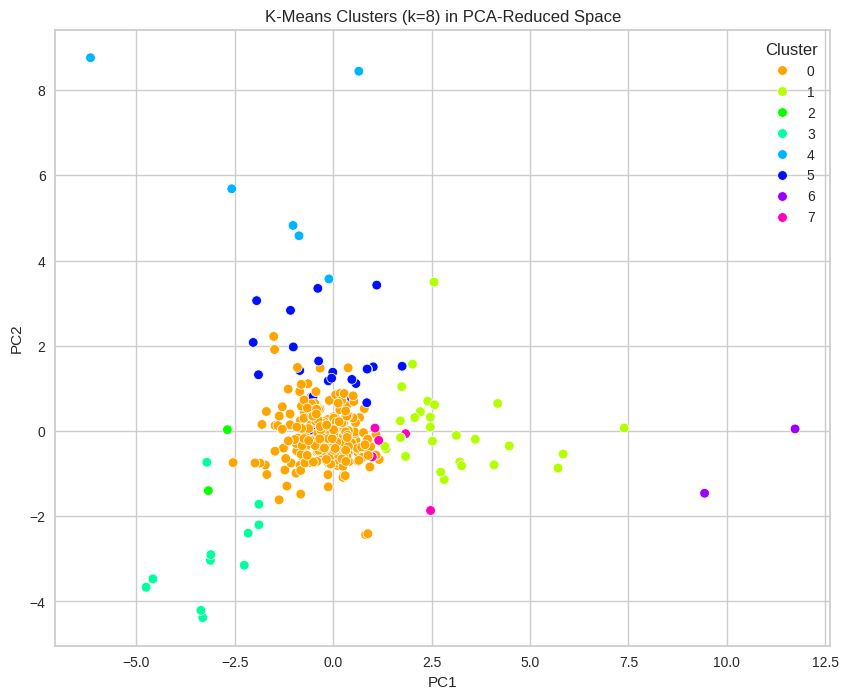

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Cluster',
    palette=sns.color_palette("hsv", k),
    data=pca_df,
    legend='full'
)
plt.title(f'K-Means Clusters (k={k}) in PCA-Reduced Space')
plt.show()

The different colored points represent the 8 clusters identified by the K-means algorithm. Each cluster is represented by a different color.
Cluster 0 (orange) is concentrated near the center, suggesting that these data points are closer to the mean of the principal components and may be less extreme in their features.
Other clusters (such as clusters 2 and 4) are more spread out, indicating greater variance within these groups.
Separation of Clusters:

Some clusters, like clusters 6 and 2 (in magenta and green), appear to be more distinct from others, indicating that the data points in these clusters have unique characteristics.
Conversely, clusters near the center may have more overlap, indicating that they share similar characteristics and might be harder to differentiate.

<ipython-input-84-2a6d0c084f1a>:3: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


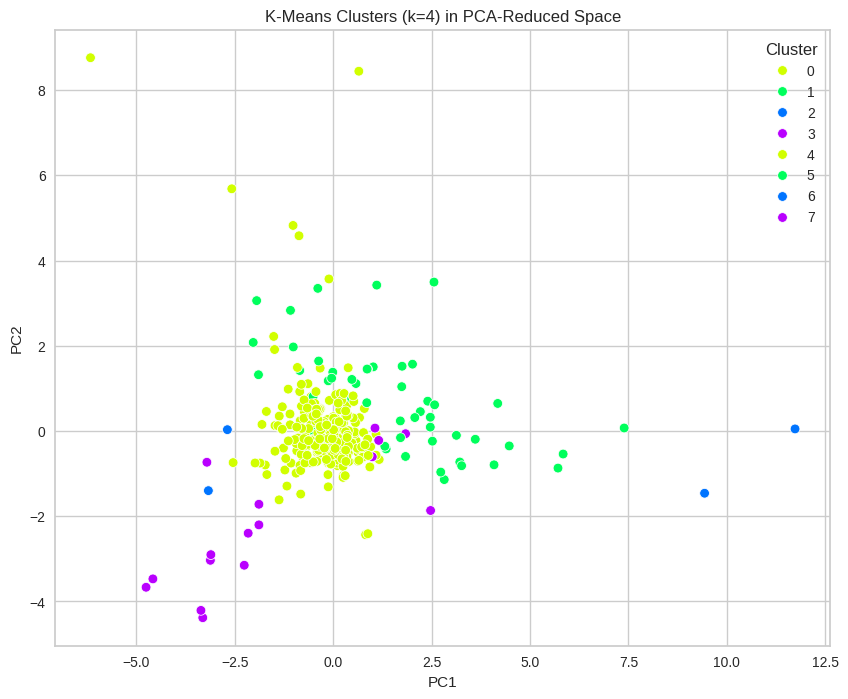

In [ ]:
# so much overlap so lets check 4 clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Cluster',
    palette=sns.color_palette("hsv", 4),
    data=pca_df,
    legend='full'
)
plt.title(f'K-Means Clusters (k={4}) in PCA-Reduced Space')
plt.show()

The 4 clusters capture broader patterns and less overlap compared to when k=8, possibly smoothing over some of the more subtle variations that the PCA might have revealed.

In [ ]:
pca_scaled_df['PCA_KMeans_Cluster'] = df['PCA_KMeans_Cluster']

In [ ]:
# Group by PCA KMeans Cluster and calculate the mean of each feature within each cluster
cluster_profiles = pca_scaled_df.groupby('PCA_KMeans_Cluster').mean()

# Display the cluster profiles
print(cluster_profiles)

                    Current Price  Price Change  Volatility       ROE  \
PCA_KMeans_Cluster                                                      
0                       -0.079243      0.074386   -0.250297 -0.149691   
1                       -0.435787     -1.605014    2.211112  0.088699   
2                       -0.564007      0.597207   -0.344579 -0.281074   
3                       -0.310334      0.125948   -0.651189 -0.083518   
4                        5.636281      0.274924    0.026005 -0.210193   
5                        0.147268      0.887454    0.488685 -0.141512   
6                       -0.575803     -1.453888    3.311126  7.908297   
7                        0.280272      0.555489   -0.609690  5.462377   

                    Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
PCA_KMeans_Cluster                                                              
0                    -0.209527      -0.015934   -0.000909            0.146553   
1                    -0.23

In [ ]:
# Count the number of instances in each cluster for PCA-based K-Means clusters
cluster_counts_pca = df['PCA_KMeans_Cluster'].value_counts().sort_index()

# Ensure cluster_profile is calculated using PCA-based clusters
cluster_profile_pca = pca_scaled_df.groupby('PCA_KMeans_Cluster').mean().reset_index()

In [ ]:
# Add the counts to the cluster_profile DataFrame
cluster_profile_pca['count_in_each_segments'] = cluster_counts_pca.values
cluster_profile_pca

PCA_KMeans_Cluster  Current Price  Price Change  Volatility       ROE  \
0                   0      -0.079243      0.074386   -0.250297 -0.149691   
1                   1      -0.435787     -1.605014    2.211112  0.088699   
2                   2      -0.564007      0.597207   -0.344579 -0.281074   
3                   3      -0.310334      0.125948   -0.651189 -0.083518   
4                   4       5.636281      0.274924    0.026005 -0.210193   
5                   5       0.147268      0.887454    0.488685 -0.141512   
6                   6      -0.575803     -1.453888    3.311126  7.908297   
7                   7       0.280272      0.555489   -0.609690  5.462377   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0   -0.209527      -0.015934   -0.000909            0.146553   
1   -0.235310      -0.082314   -0.996920           -1.374091   
2    0.669815       8.592722    3.090627            0.078798   
3   -0.064701      -1.356966    3.350275            0.260600   
4    0.978087      -0.040949   -0.149196            2.051257   
5    2.645810       0.303592   -0.158322           -0.117101   
6   -0.210698      -0.693613   -5.236157           -6.778822   
7   -0.480943      -0.172008   -0.205168           -0.186781   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  count_in_each_segments  
0                     -0.174368  -0.209826  -0.112612                     265  
1                     -0.114615   1.285592   0.219796                      27  
2                      2.622293  -0.428216   0.231367                       2  
3                      4.067166  -0.420077  -0.260867                      11  
4                     -0.534250   2.042222   2.658328                       6  
5                      0.182121   0.572175   0.696323                      22  
6                     -0.068025   0.635362   0.235430                       2  
7                     -0.269264   0.051630  -1.085094                       5

In [ ]:
# Display the cluster profiles, highlighting the maximum values
cluster_profile_pca.style.highlight_max(color="lightgreen", axis=0)

In [ ]:
# Cross-tabulation with GICS Sector using the new PCA-based clusters
pd.crosstab(df['PCA_KMeans_Cluster'], df['GICS Sector']).style.highlight_max(color="lightgreen", axis=0)


In [ ]:
# Cross-tabulation with GICS Sub Industry using the new PCA-based clusters
pd.crosstab(df['PCA_KMeans_Cluster'], df['GICS Sub Industry']).style.highlight_max(color="lightgreen", axis=0)


Within PCA we are still seeing a dense cluster that holds over 250 data instances

## Hierarchical Clustering

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9491539143376989.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8495009158427184.
Cophenetic correlation for Euclidean distance and average linkage is 0.9631597049519723.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.9302127377227645.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9521380272089968.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.7110268845050226.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9533213014473075.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9117337278181489.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9491359010219682.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7186800212680372.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9480355343659964.
Cophenetic co

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9631597049519723, which is obtained with Euclidean distance and average linkage.


In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9491539143376989.
Cophenetic correlation for complete linkage is 0.8495009158427184.
Cophenetic correlation for average linkage is 0.9631597049519723.
Cophenetic correlation for centroid linkage is 0.9614250465608494.
Cophenetic correlation for ward linkage is 0.8422481149846429.
Cophenetic correlation for weighted linkage is 0.9302127377227645.


In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9631597049519723, which is obtained with average linkage.


We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.
Exploring Eucledian distances further, we still can conclude the highest correlation occurs with average linkage with Eucledian measurements.

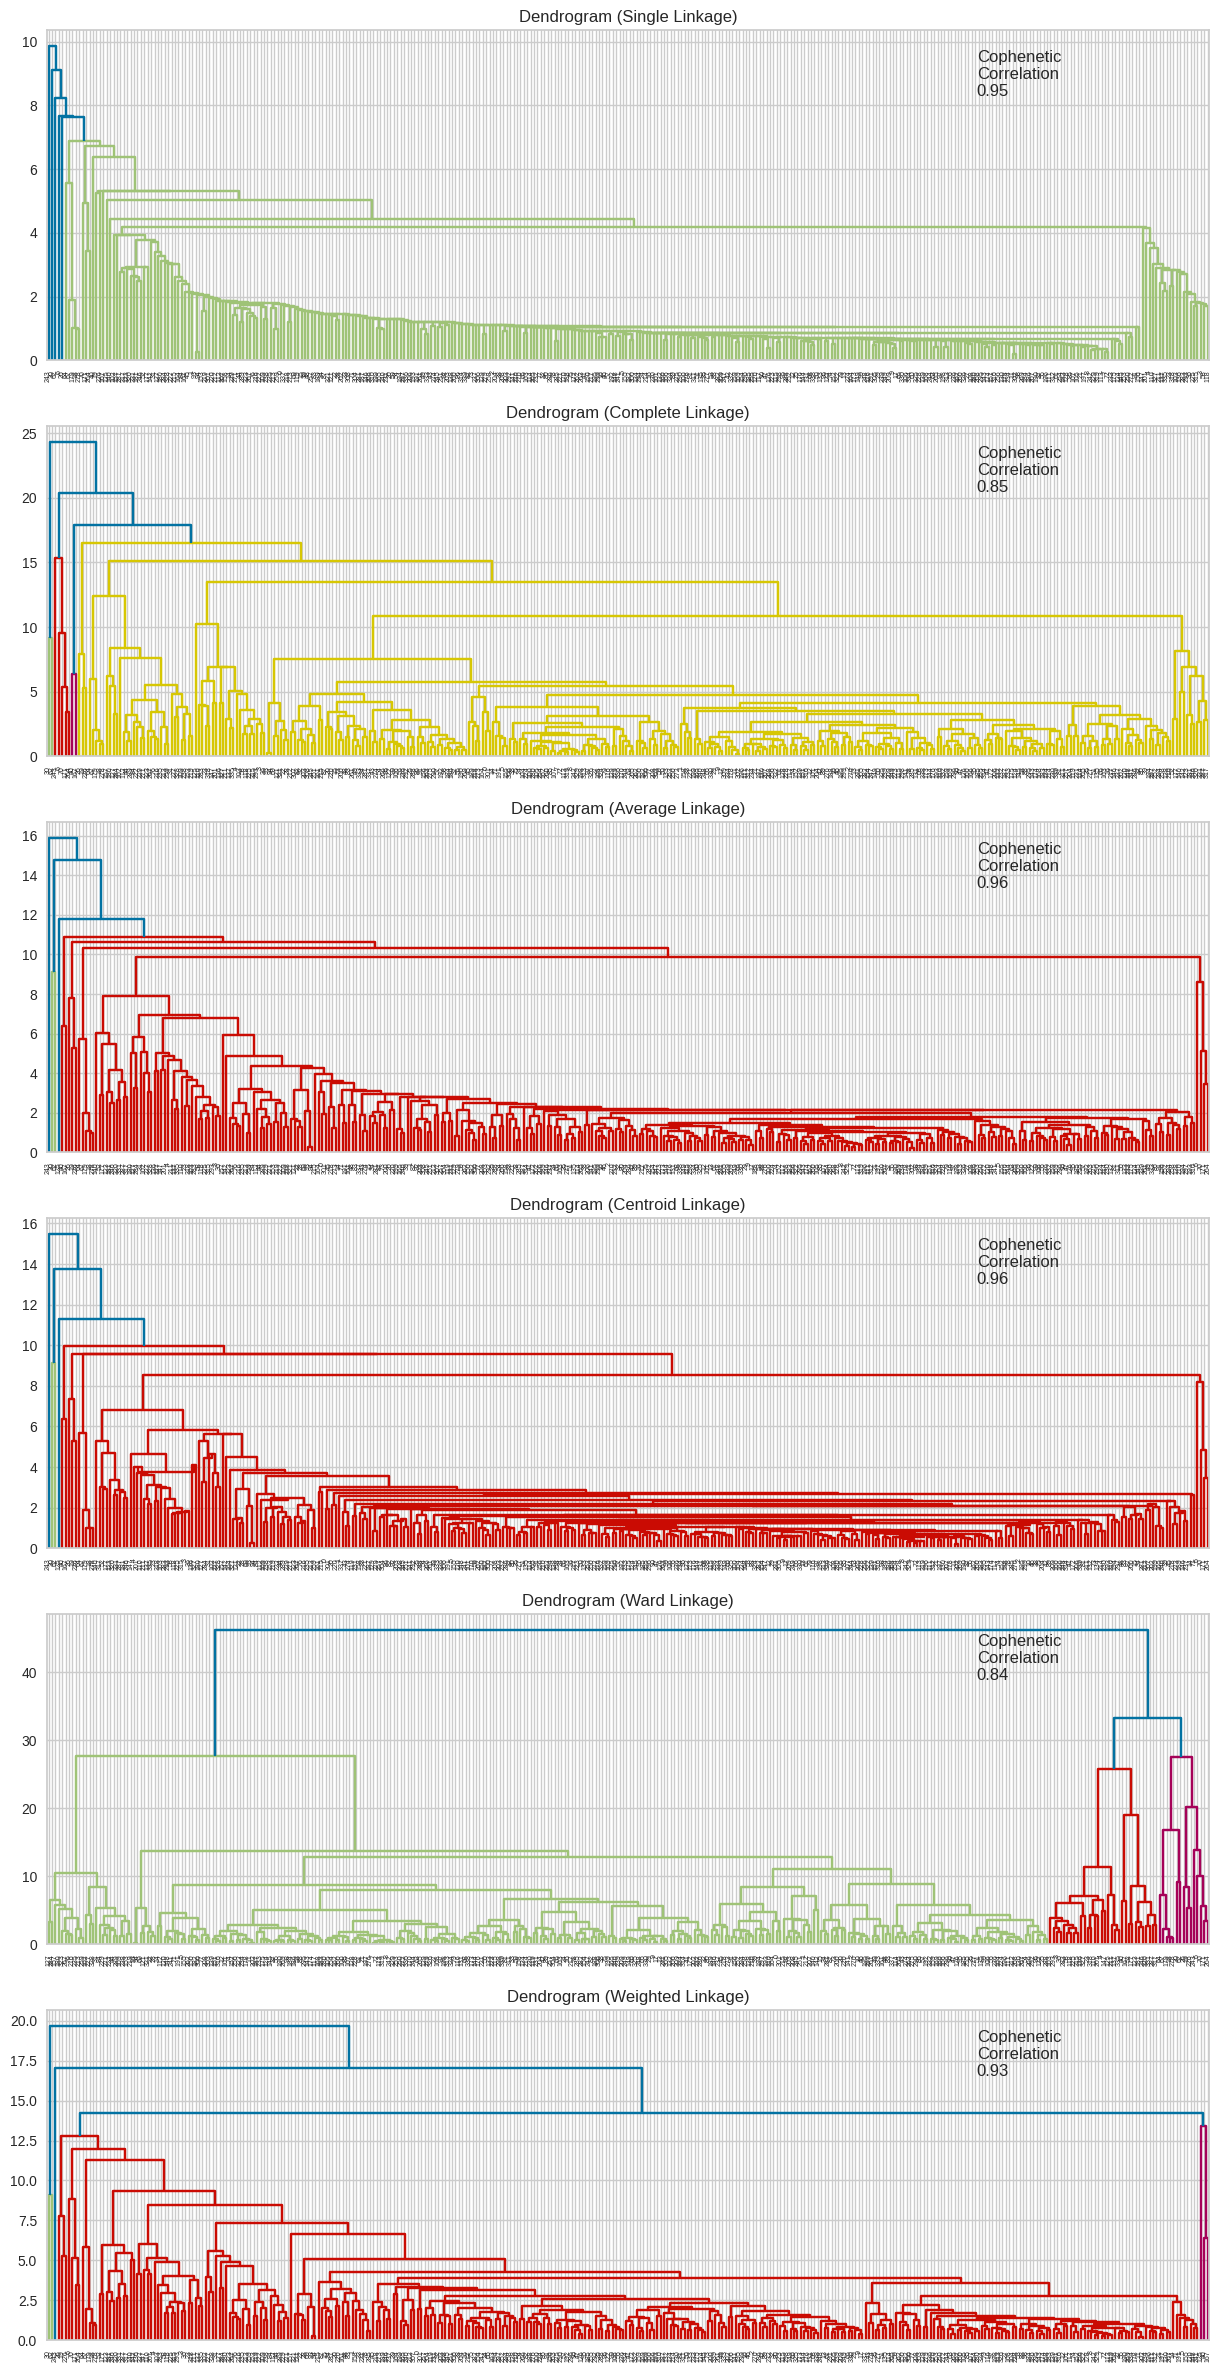

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

Ward linkage and complete linkage form the most distinct clusters.

In [ ]:
# let's create a dataframe to compare cophenetic correlations for each linkage method
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

Linkage  Cophenetic Coefficient
0    single                0.949154
1  complete                0.849501
2   average                0.963160
3  centroid                0.961425
4      ward                0.842248
5  weighted                0.930213

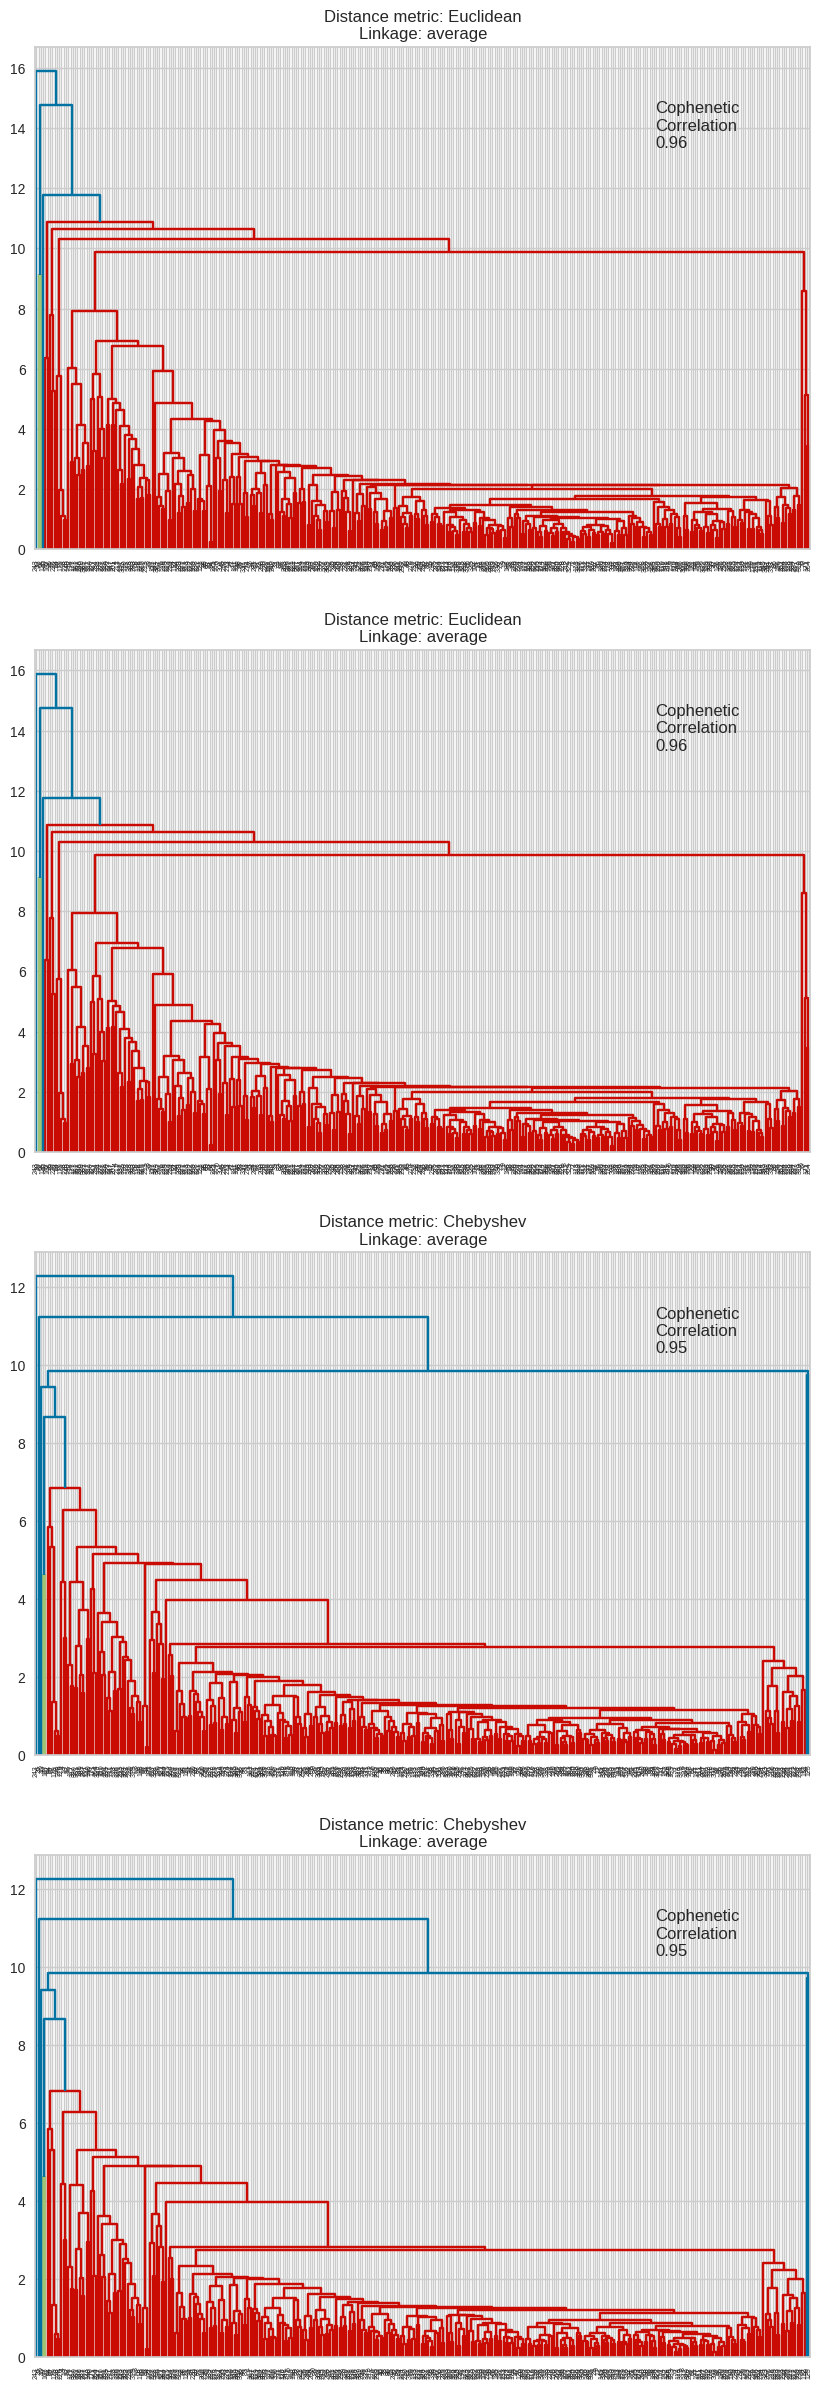

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev"]

# list of linkage methods
linkage_methods = ["average", "average"]

# to create a subplot image
fig, axs = plt.subplots(
    len(distance_metrics) + len(distance_metrics), 1, figsize=(10, 30)
)

i = 0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)

        dendrogram(Z, ax=axs[i])
        axs[i].set_title("Distance metric: {}\nLinkage: {}".format(dm.capitalize(), lm))

        coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
        axs[i].annotate(
            f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
            (0.80, 0.80),
            xycoords="axes fraction",
        )
        i += 1

Out of all the clusters we have explored, Ward clustering seems to be the most disticnt and seperate clusters. Within the Ward dendogram, 5 would be the appropriate amount of clusters within the Ward clusters

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [ ]:
# adding hierarchical cluster labels to the original and scaled dataframes

subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

In [ ]:
HCmodel.labels_

array([4, 4, 4, 0, 0, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 4, 4,
       4, 0, 4, 4, 2, 4, 4, 4, 1, 3, 4, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4,
       3, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 0, 4, 4, 4, 1, 4, 1, 4,
       4, 1, 4, 4, 2, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 0, 4, 4, 4, 4, 4, 3,
       0, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 0, 4, 0, 4, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 3,
       4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 2, 4, 4, 4, 4,
       4, 0, 4, 1, 3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 3, 4, 4, 3, 4, 4, 3,
       4, 4, 3, 4, 4, 0, 2, 3, 4, 3, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4,
       4, 2, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4,
       2, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 0, 3, 4,
       4, 0, 4, 3, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4,

In [ ]:
df["HC_Clusters"].value_counts()

HC_Clusters
4    268
0     32
3     25
2      8
1      7
Name: count, dtype: int64

This time, cluster 2 is the most dense cluster.

In [ ]:
subset_scaled_df.head(10)

Current Price  Price Change  Volatility       ROE  Cash Ratio  \
0      -0.393341      0.493950    0.272749  0.989601   -0.210698   
1      -0.220837      0.355439    1.137045  0.937737    0.077269   
2      -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3       0.133567      0.825696   -0.284802 -0.317379    1.218059   
4      -0.260874     -0.492636    0.296470 -0.265515    2.237018   
5      -0.451251     -1.342556   -0.016049 -0.307006   -0.232849   
6       1.998837      0.176091   -0.692132 -0.099549   -0.498664   
7      -0.384353     -0.158797   -0.679931 -0.317379   -0.620496   
8      -0.230744     -0.142338   -0.774192 -0.296633   -0.675874   
9      -0.214096     -0.087667   -0.808359 -0.265515    0.320933   

   Net Cash Flow  Net Income  Earnings Per Share  \
0      -0.339355    1.554415            1.309399   
1      -0.002335    0.927628            0.056755   
2       0.454058    0.744371            0.024831   
3      -0.152497   -0.219816           -0.230563   
4       0.133564   -0.202703           -0.374982   
5      -0.125823    0.090133            0.032432   
6       0.018187   -0.228206            0.932390   
7       0.119096   -0.218177           -0.026856   
8      -0.021424    0.141806            0.053714   
9      -0.187053    0.263986            0.471769   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  K_means_segments  \
0                      0.107863  -0.652487  -0.506653                 2   
1                      1.250274  -0.311769  -0.504205                 2   
2                      1.098021  -0.391502   0.094941                 2   
3                     -0.091622   0.947148   0.424333                 2   
4                      1.978399   3.293307   0.199196                 1   
5                      0.048977  -0.459427   0.660752                 2   
6                     -0.603923  -0.035502   9.377562                 7   
7                     -0.393572  -0.360984   0.071614                 2   
8                     -0.183672  -0.319668  -0.093530                 2   
9                     -0.173153  -0.506408  -0.011879                 2   

   Cluster  HC_Clusters  
0        0            4  
1        0            4  
2        0            4  
3        5            0  
4        5            0  
5        0            4  
6        4            2  
7        0            4  
8        0            4  
9        0            4

In [ ]:
df.head(10)


GICS Sector                      GICS Sub Industry  \
0             Industrials                               Airlines   
1             Health Care                        Pharmaceuticals   
2             Health Care                  Health Care Equipment   
3  Information Technology                   Application Software   
4  Information Technology                         Semiconductors   
5        Consumer Staples                  Agricultural Products   
6  Information Technology  Data Processing & Outsourced Services   
7               Utilities                         MultiUtilities   
8               Utilities                     Electric Utilities   
9              Financials                Life & Health Insurance   

   Current Price  Price Change  Volatility  ROE  Cash Ratio  Net Cash Flow  \
0      42.349998      9.999995    1.687151  135          51     -604000000   
1      59.240002      8.339433    2.197887  130          77       51000000   
2      44.910000     11.301121    1.273646   21          67      938000000   
3      93.940002     13.977195    1.357679    9         180     -240840000   
4      55.320000     -1.827858    1.701169   14         272      315120000   
5      36.680000    -12.017268    1.516493   10          49     -189000000   
6     276.570007      6.189286    1.116976   30          25       90885000   
7      43.230000      2.174424    1.124186    9          14      287000000   
8      58.270000      2.371753    1.068485   11           9       13900000   
9      59.900002      3.027181    1.048295   14          99     -308000000   

   Net Income  Earnings Per Share  Estimated Shares Outstanding   P/E Ratio  \
0  7610000000               11.39                  6.681299e+08    3.718174   
1  5144000000                3.15                  1.633016e+09   18.806350   
2  4423000000                2.94                  1.504422e+09   15.275510   
3   629551000                1.26                  4.996437e+08   74.555557   
4   696878000                0.31                  2.247994e+09  178.451613   
5  1849000000                2.99                  6.183946e+08   12.267559   
6   596541000                8.91                  6.695185e+07   31.040405   
7   636000000                2.60                  2.446154e+08   16.626923   
8  2052300000                3.13                  4.218978e+08   18.456543   
9  2533000000                5.88                  4.307823e+08   10.187075   

    P/B Ratio  K_means_segments  PCA_KMeans_Cluster  HC_Clusters  
0   -8.784219                 2                   0            4  
1   -8.750068                 2                   0            4  
2   -0.394171                 2                   0            4  
3    4.199651                 2                   5            0  
4    1.059810                 1                   5            0  
5    7.496831                 2                   0            4  
6  129.064585                 7                   4            2  
7   -0.719497                 2                   0            4  
8   -3.022649                 2                   0            4  
9   -1.883912                 2                   0            4

In [ ]:
cluster_profile = subset_scaled_df.groupby('HC_Clusters').mean().reset_index()

In [ ]:
cluster_profile

HC_Clusters  Current Price  Price Change  Volatility       ROE  Cash Ratio  \
0            0      -0.067288      0.625385    0.075593 -0.145254    1.781186   
1            1       0.035679     -0.018619    0.510543  6.161211   -0.403730   
2            2       4.410292      0.470272    0.353072 -0.249955    0.899635   
3            3      -0.472605     -1.672476    2.258112  0.125335   -0.309935   
4            4      -0.080462      0.067790   -0.243545 -0.147814   -0.200077   

   Net Cash Flow  Net Income  Earnings Per Share  \
0       0.297535    1.049668           -0.037450   
1      -0.321038   -1.642594           -2.070221   
2       0.011136   -0.198383            1.451348   
3      -0.111713   -1.048400           -1.455418   
4      -0.017053    0.021290            0.150987   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  K_means_segments  \
0                      1.630581   0.083593   0.427596          0.750000   
1                     -0.211767   0.218411  -0.707801          5.714286   
2                     -0.477557   3.252691   1.846440          5.875000   
3                     -0.096360   1.007008   0.216430          3.000000   
4                     -0.165921  -0.206719  -0.107876          1.988806   

    Cluster  
0  4.250000  
1  6.714286  
2  3.750000  
3  1.000000  
4  0.026119

In [ ]:
# Counting the number of instances in each HC_Clusters
cluster_counts = df['HC_Clusters'].value_counts().sort_index()

In [ ]:
# Adding the counts to the cluster_profile DataFrame
cluster_profile['count_in_each_segments'] = cluster_counts.values

In [ ]:
cluster_profile

HC_Clusters  Current Price  Price Change  Volatility       ROE  Cash Ratio  \
0            0      -0.067288      0.625385    0.075593 -0.145254    1.781186   
1            1       0.035679     -0.018619    0.510543  6.161211   -0.403730   
2            2       4.410292      0.470272    0.353072 -0.249955    0.899635   
3            3      -0.472605     -1.672476    2.258112  0.125335   -0.309935   
4            4      -0.080462      0.067790   -0.243545 -0.147814   -0.200077   

   Net Cash Flow  Net Income  Earnings Per Share  \
0       0.297535    1.049668           -0.037450   
1      -0.321038   -1.642594           -2.070221   
2       0.011136   -0.198383            1.451348   
3      -0.111713   -1.048400           -1.455418   
4      -0.017053    0.021290            0.150987   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  K_means_segments  \
0                      1.630581   0.083593   0.427596          0.750000   
1                     -0.211767   0.218411  -0.707801          5.714286   
2                     -0.477557   3.252691   1.846440          5.875000   
3                     -0.096360   1.007008   0.216430          3.000000   
4                     -0.165921  -0.206719  -0.107876          1.988806   

    Cluster  count_in_each_segments  
0  4.250000                      32  
1  6.714286                       7  
2  3.750000                       8  
3  1.000000                      25  
4  0.026119                     268

In [ ]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

* We still observe a dominant cluster present- this time in cluster 4- including 268 instances
* Cluster 0, the second largest cluster , includes stocks with the highest price changes, cash ratio, net cash flow, net income and estimated shares outstanding.
* The lowest price change belongs to cluster 3 with a change of -1.67

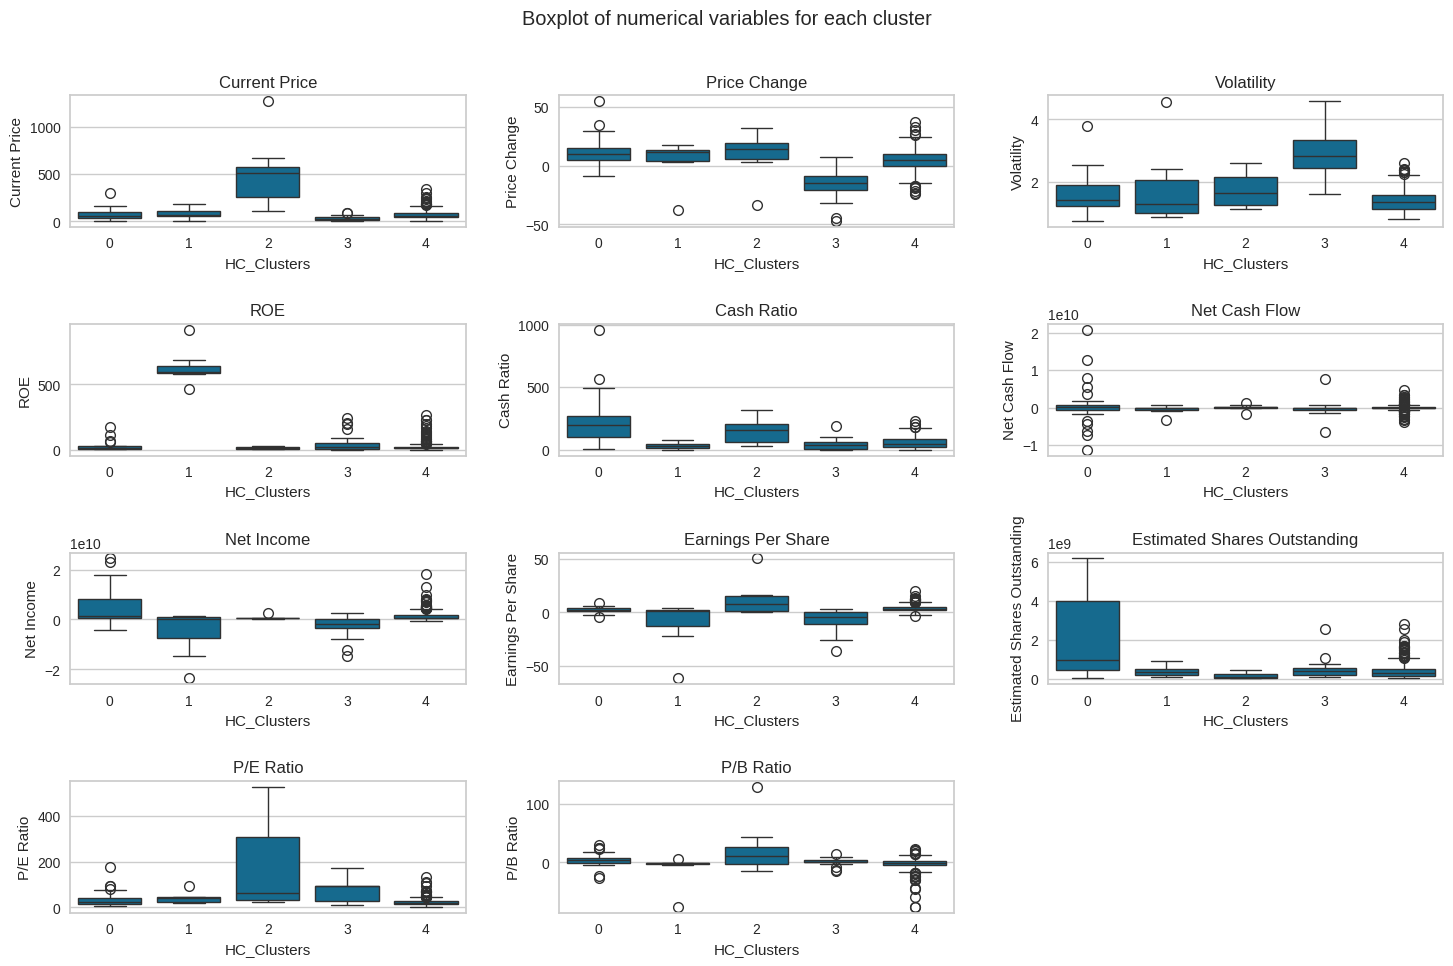

In [ ]:
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

# Adjusting the number of subplots to fit all numerical variables
num_variables = len(num_col)
rows = (num_variables // 3) + (num_variables % 3 > 0)  # Calculate rows needed

for i, variable in enumerate(num_col):
    plt.subplot(rows, 3, i + 1)  # Create subplot for each variable
    sns.boxplot(data=df, x="HC_Clusters", y=variable)
    plt.title(variable)

plt.tight_layout(pad=2.0)
plt.show()

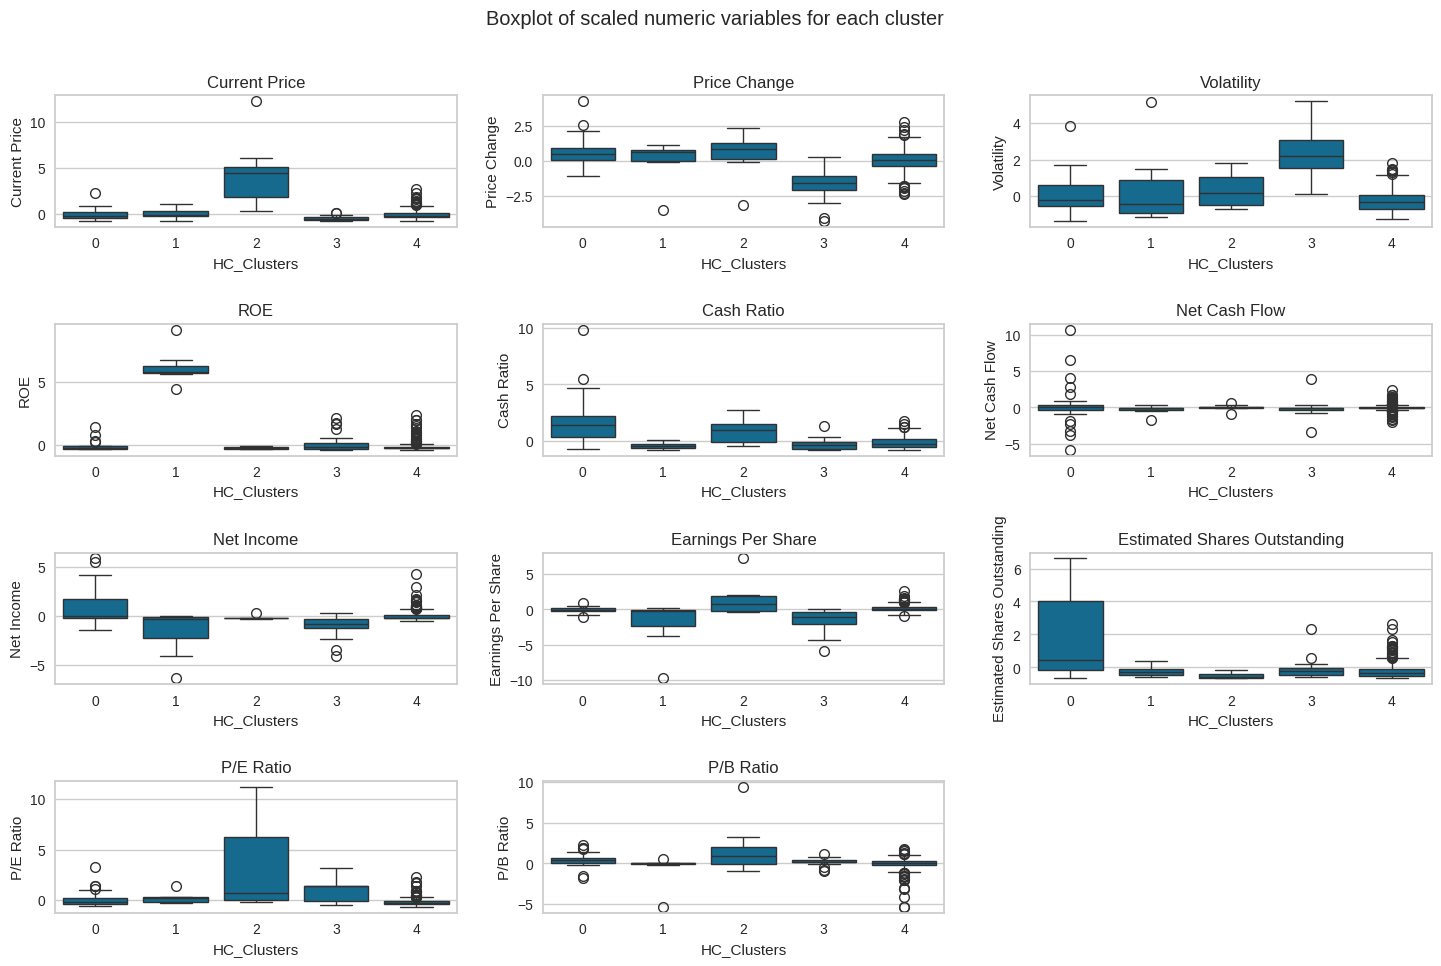

In [ ]:
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of scaled numeric variables for each cluster")

# Adjusting the number of subplots to fit all numerical variables
num_variables = len(num_col)
rows = (num_variables // 3) + (num_variables % 3 > 0)  # Calculate rows needed

for i, variable in enumerate(num_col):
    plt.subplot(rows, 3, i + 1)  # Create subplot for each variable
    sns.boxplot(data=subset_scaled_df, x="HC_Clusters", y=variable)
    plt.title(variable)

plt.tight_layout(pad=2.0)
plt.show()

In [ ]:
pd.crosstab(df['HC_Clusters'], df['GICS Sector']).style.highlight_max(color="lightgreen", axis=0)


Cluster 0 can be characterized as Telecomunication Services Sector Stocks, whereas Cluster 3 can be characterized as Energy Sector Stocks. Sector 4 includes all remaining sectors.

In [ ]:
pd.crosstab(df['HC_Clusters'], df['GICS Sub Industry']).style.highlight_max(color="lightgreen", axis=0)


We still have dimensionality problems and we are going to explore PCA for visualization

In [ ]:

pca_scaled_df = subset_scaled_df.drop(["HC_Clusters"], axis=1)

pca_scaled_df.head()


Current Price  Price Change  Volatility       ROE  Cash Ratio  \
0      -0.393341      0.493950    0.272749  0.989601   -0.210698   
1      -0.220837      0.355439    1.137045  0.937737    0.077269   
2      -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3       0.133567      0.825696   -0.284802 -0.317379    1.218059   
4      -0.260874     -0.492636    0.296470 -0.265515    2.237018   

   Net Cash Flow  Net Income  Earnings Per Share  \
0      -0.339355    1.554415            1.309399   
1      -0.002335    0.927628            0.056755   
2       0.454058    0.744371            0.024831   
3      -0.152497   -0.219816           -0.230563   
4       0.133564   -0.202703           -0.374982   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  K_means_segments  \
0                      0.107863  -0.652487  -0.506653                 2   
1                      1.250274  -0.311769  -0.504205                 2   
2                      1.098021  -0.391502   0.094941                 2   
3                     -0.091622   0.947148   0.424333                 2   
4                      1.978399   3.293307   0.199196                 1   

   Cluster  
0        0  
1        0  
2        0  
3        5  
4        5

In [ ]:

# Assuming X is your data matrix
#pca = PCA().fit(pca_scaled_df)


pca = PCA()
pca.fit(pca_scaled_df)


# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 90% of the variance
#  + 1 below: Indices in Python are 0-based, meaning they start from 0. However, when we talk about the number of components, we count from 1.
num_components = np.argmax(cumulative_variance >= 0.90) + 1
print(f'Number of components explaining 90% of the variance: {num_components}')


Number of components explaining 90% of the variance: 8


In [ ]:
# Fit PCA with the optimal number of components
pca_opt = PCA(n_components=num_components).fit(pca_scaled_df)

# Loadings (coefficients) for the selected components
loadings = pca_opt.components_

# You can transpose this to match components to original features
loadings = loadings.T


# Assuming your feature names are in a list called 'feature_names'
feature_names = pca_scaled_df.columns.tolist()

loadings_df = pd.DataFrame(loadings, index=feature_names, columns=[f'PC{i+1}' for i in range(num_components)])
print(loadings_df)


                                   PC1       PC2       PC3       PC4  \
Current Price                 0.145630 -0.120119  0.604870  0.064289   
Price Change                  0.019851 -0.292452  0.145031  0.054674   
Volatility                    0.181271  0.328772 -0.180897 -0.226208   
ROE                           0.300546  0.195350 -0.086536  0.478399   
Cash Ratio                    0.254347 -0.256032 -0.035933 -0.419186   
Net Cash Flow                 0.001005 -0.054751 -0.005911 -0.440849   
Net Income                   -0.123109 -0.500896 -0.081256  0.158692   
Earnings Per Share           -0.157528 -0.356396  0.436268  0.064801   
Estimated Shares Outstanding  0.052980 -0.353620 -0.407372  0.136284   
P/E Ratio                     0.209005  0.128878  0.105540 -0.232700   
P/B Ratio                     0.128683 -0.050230  0.156813 -0.439548   
K_means_segments              0.231679  0.296774  0.403994  0.195716   
Cluster                       0.796130 -0.273994 -0.098667  0.09

In [ ]:
# Calculate the importance of each feature
feature_importance = np.sum(np.abs(loadings_df), axis=1)

# Sort features by importance
sorted_features = feature_importance.sort_values(ascending=False)


# represents the cumulative importance of each feature across the selected principal components.
print("Features sorted by importance:")
print(sorted_features)


Features sorted by importance:
P/B Ratio                       2.255561
P/E Ratio                       2.045273
Price Change                    1.845866
Net Cash Flow                   1.838966
ROE                             1.822478
Cash Ratio                      1.770102
Earnings Per Share              1.747003
Estimated Shares Outstanding    1.693465
Volatility                      1.618106
K_means_segments                1.561340
Net Income                      1.514662
Cluster                         1.513753
Current Price                   1.362895
dtype: float64


Performing the PCA analysis, we see that the least influential features include Current Price and Net Income where the most important features are P/B Ratio and P/E Ratio

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

## Actionable Insights and Recommendations

When it comes to K means and Heirarchal Clustering, both procedures took a similar amount of time within this dataset. Although both methods had their own sets of ambiguities in relation to visually inspecting cluster selections based on graphs- they each resulted in  similar findings. When it came to both methods, there was a prevalent cluster that included most sectors and resulting clusters included low instances.

Recommendations that we can suggest are further reducing dimensionality, and conducting further research and analysis on the prevalent class.